In [1]:
import time
#import board
#import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns
import datetime
import os
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import l2
from numpy import loadtxt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
def file():
    
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    #file_name = 'csvFile_2021_04_28'
    file_name = 'csvFile_2021_05_13'
    #file_name = 'DLTemLongerDatasetDischargecsvFile_2021_05_20'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    suffix = '.csv'
    filePath = os.path.join(os.getcwd(), file_name + suffix)
    return  filePath


In [3]:
def fileNameForDLFigures(midfix = None):
    
    
    from datetime import date
    today = date.today()
    # dd/mm/YY
    d1 = today.strftime("%d_%m_%Y")
    #print("d1 =", d1)
    cwdir = os.getcwd()
    mkSubDir =  os.path.join(cwdir, d1)
    mkSubDir
    if not os.path.exists(mkSubDir):
        #os.makedirs('my_folder')
        os.mkdir(mkSubDir)
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    head, tail = os.path.split(file())
    name =tail.split('_')[1:]
    file_name = "_".join(name)
    file_name=file_name.split('.')[0]
    #join

    #file_name = 'DL_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    
    #cwdir = os.getcwd()
    #mkSubDir =  os.path.join(cwdir, 'DL_sub')
    suffix = '.svg'
    filePath = os.path.join(mkSubDir, midfix + file_name +suffix)
    return  filePath

In [4]:
def modelDir(ModelName=None):
    model = fileNameForDLFigures(midfix = 'Tem').split('/')[:-1]
    model_dir = "/".join(model)
    #model_dir 
    modelPath = os.path.join(model_dir, ModelName)
    return modelPath

In [5]:
def filePath2Pandas(file_path):
    drop_column = 'Unnamed: 0'
    df = pd.read_csv(file_path, delimiter=',').drop(drop_column, axis = 'columns')

    column_names =  ['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T4', 'T3', 'T2', 'T1',
        'T0', 'T9', 'T8', 'T7', 'T6', 'T5', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']
    df.columns =column_names
    df = df[['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
        'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']]
    
    #df.columns.values[[11,12,13,14,15,16,17,18,19,20]] = ['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']

    return df
df_gross=filePath2Pandas(file())  


In [6]:
df_gross.columns

Index(['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
       'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ'],
      dtype='object')

In [33]:
disAvailability = df_gross[['DisTotalTanksEnergyForAvailability_kJ']].dropna()
disAvailability

,DisTotalTanksEnergyForAvailability_kJ
0,80166.107204
1,80141.432179
2,80095.704814
3,80090.528800
4,80017.475276
...,...
471,40570.597193
472,40535.914064
473,40583.990582
474,40536.783892


In [35]:
disEntropy = df_gross[['DisEntropy_kj/K']].dropna()
disEntropy

,DisEntropy_kj/K
0,41.970253
1,47.659192
2,58.083490
3,61.292859
4,66.818207
...,...
471,894.029521
472,873.262510
473,841.317629
474,823.735748


In [54]:

def alltem_df(df):
    #df_tem = df[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    ##df_tem = df_tem[df_tem>0]
    #df_charging = df.loc[df_gross['Heat_Capacity_kW']>0.2]

    #df_tem = df_charging[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    df_all = df[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]
    df_extraFeatures = df[['flowLoad']]
    df_conc = pd.concat( [df_extraFeatures,df_all],  ignore_index=True, axis =1 )
    #df_chargeFilter = df_charging_all[(df_charging_all['nStratCharging']>0.000001)&\
    #                           (df_charging_all['nStratCharging']<1.1)]
    #df_charging_all.dropna()
    print ('concated is ', df_conc)
    return df_conc 

allTem = alltem_df(df_gross)

concated is                0        1        2        3        4        5        6  \
0       1.32313  27.0880  28.1374  28.8824  29.4920  29.4581  29.4243   
1      -0.25497  27.0880  28.1036  28.8824  29.4920  29.3904  29.6953   
2       2.11217  27.0880  28.1036  28.8824  29.4920  29.4243  29.5598   
3       1.32313  27.0203  28.1036  28.8824  29.4243  29.3904  29.4243   
4       1.32313  27.0542  28.1036  28.8824  29.4581  29.3565  29.5598   
...         ...      ...      ...      ...      ...      ...      ...   
1041  342.98100  22.0148  22.3866  22.5556  22.6570  22.5218  22.8260   
1042  342.98100  22.0486  22.4204  22.5894  22.7246  22.5556  22.8260   
1043  339.82500  22.0148  22.4542  22.5556  22.7246  22.5894  22.8260   
1044  253.81800  22.0486  22.4880  22.5894  22.7246  22.5894  22.8598   
1045  209.63200  22.0148  22.4880  22.5894  22.7246  22.6232  22.8598   

            7        8        9       10  
0     29.4581  29.6275  29.6953  29.3904  
1     29.4581  29.5936  

In [50]:
len_tocut =  len(df_gross) -len(disAvailability)

In [51]:
len_tocut

570

In [75]:
indexed_tem = allTem.iloc[len_tocut:, :].reset_index(drop=True)

In [76]:
indexed_tem

,0,1,2,3,4,5,6,7,8,9,10
0,336.668,38.8536,51.1379,51.4788,52.1267,52.5018,52.6042,52.6383,52.7406,52.8088,52.6724
1,360.340,38.6158,51.0356,51.5129,52.1608,52.4677,52.6383,52.6042,52.7406,52.8429,52.6383
2,393.480,38.5819,50.9334,51.5129,52.2290,52.4677,52.6724,52.6383,52.7406,52.7747,52.6724
3,417.940,38.6837,50.5243,51.4788,52.1608,52.4677,52.6042,52.6383,52.7065,52.8088,52.6383
4,418.729,38.7177,50.1835,51.4106,52.1949,52.5018,52.5700,52.6042,52.7406,52.7747,52.6383
...,...,...,...,...,...,...,...,...,...,...,...
471,342.981,22.0148,22.3866,22.5556,22.6570,22.5218,22.8260,22.7584,23.0964,25.5652,41.6740
472,342.981,22.0486,22.4204,22.5894,22.7246,22.5556,22.8260,22.7922,23.0964,25.5991,41.7079
473,339.825,22.0148,22.4542,22.5556,22.7246,22.5894,22.8260,22.8260,23.0964,25.3623,41.6060
474,253.818,22.0486,22.4880,22.5894,22.7246,22.5894,22.8598,22.8260,23.0964,25.0240,41.1981


In [77]:
df_tem_entropy_conc = pd.concat( [disEntropy,disAvailability ,indexed_tem],  ignore_index=True, axis =1 )

In [78]:
df_tem_entropy_conc

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,41.970253,80166.107204,336.668,38.8536,51.1379,51.4788,52.1267,52.5018,52.6042,52.6383,52.7406,52.8088,52.6724
1,47.659192,80141.432179,360.340,38.6158,51.0356,51.5129,52.1608,52.4677,52.6383,52.6042,52.7406,52.8429,52.6383
2,58.083490,80095.704814,393.480,38.5819,50.9334,51.5129,52.2290,52.4677,52.6724,52.6383,52.7406,52.7747,52.6724
3,61.292859,80090.528800,417.940,38.6837,50.5243,51.4788,52.1608,52.4677,52.6042,52.6383,52.7065,52.8088,52.6383
4,66.818207,80017.475276,418.729,38.7177,50.1835,51.4106,52.1949,52.5018,52.5700,52.6042,52.7406,52.7747,52.6383
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,894.029521,40570.597193,342.981,22.0148,22.3866,22.5556,22.6570,22.5218,22.8260,22.7584,23.0964,25.5652,41.6740
472,873.262510,40535.914064,342.981,22.0486,22.4204,22.5894,22.7246,22.5556,22.8260,22.7922,23.0964,25.5991,41.7079
473,841.317629,40583.990582,339.825,22.0148,22.4542,22.5556,22.7246,22.5894,22.8260,22.8260,23.0964,25.3623,41.6060
474,823.735748,40536.783892,253.818,22.0486,22.4880,22.5894,22.7246,22.5894,22.8598,22.8260,23.0964,25.0240,41.1981


In [72]:
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap
scm = create_color_step_obj('jet', 10)

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f865a63b790>)

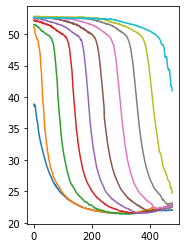

In [82]:
fig = plt.figure(1)
ax = fig.add_subplot(121)

#fig.canvas.draw()
fig.show()
#fig.canvas.draw()
#plt.rcParams["figure.figsize"]=5,5
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 8
#fig_size[1] = 3

def plotObject(df, ax, fig, alpha =0.7, scm=None):
    #ax.clear()
    #df= df.iloc[:, 1:]
    df = df.iloc[:, 3:]
    for i in range (0, df.shape[1]):
        #print ('last shape[1] is:', df.shape[1])
        ax.plot(df.index, df.iloc[:, i],\
                label = 'Layer ' + str(i))
        
    #fig.canvas.draw()
    #ax.legend()
    #fig.show()
    #print ('df is :', df)
    #plt.legend(loc='upper left')
    return fig, ax
plotObject(df_tem_entropy_conc, ax, fig, alpha =0.7, scm=None)

In [86]:
"""
Normalization should be done BEFORE one prepares the data for ANN or LSTM input.
Normalization is done feature-wise (that means column-wise).
"""

def normalize(X):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(X)
    scaled_data = scaler.transform(X)
    return scaled_data, scaler

df_nrm, scaler = normalize(df_tem_entropy_conc)
df_nrm = pd.DataFrame(df_nrm)
#df_nrm.columns = chargingIn_df.columns

df_nrm.columns = ['entropy', 'availability', 'flowLoad', 'T0', 'T1', 'T2', 'T3', \
                  'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
df_nrm

,entropy,availability,flowLoad,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,-1.000000,1.000000,0.205985,1.000000,1.000000,0.997735,0.993333,1.000000,0.995575,1.000000,1.00000,0.997575,1.000000
1,-0.989392,0.998758,0.430709,0.972688,0.993095,1.000000,0.995555,0.997797,0.997788,0.997756,1.00000,1.000000,0.994143
2,-0.969954,0.996455,0.745315,0.968794,0.986196,1.000000,1.000000,0.997797,1.000000,1.000000,1.00000,0.995150,1.000000
3,-0.963970,0.996195,0.977520,0.980486,0.958583,0.997735,0.995555,0.997797,0.995575,1.000000,0.99771,0.997575,0.994143
4,-0.953667,0.992516,0.985010,0.984391,0.935579,0.993204,0.997778,1.000000,0.993356,0.997756,1.00000,0.995150,0.994143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0.588804,-0.993622,0.265915,-0.934016,-0.940688,-0.923664,-0.927312,-0.936686,-0.936406,-0.966630,-0.99092,-0.939865,-0.889062
472,0.550081,-0.995368,0.265915,-0.930134,-0.938407,-0.921419,-0.922906,-0.934503,-0.936406,-0.964406,-0.99092,-0.937454,-0.883239
473,0.490514,-0.992947,0.235955,-0.934016,-0.936126,-0.923664,-0.922906,-0.932319,-0.936406,-0.962181,-0.99092,-0.954294,-0.900741
474,0.457730,-0.995324,-0.580531,-0.930134,-0.933844,-0.921419,-0.922906,-0.932319,-0.934213,-0.962181,-0.99092,-0.978352,-0.970801


In [92]:
def flatten_row_wise(df):
    """Take row by row and attach to one flat single row."""
    #arr = np.ndarray.flatten(np.array(df))
    #append(arr,)
    
    return np.ndarray.flatten(np.array(df))
def prepare_df(df, m, y_df):
    n_rows, n_cols = df.shape
    new_rows = np.array([np.append(flatten_row_wise(df.iloc[(i-k):i]), \
                                   m.iloc[i-k:i, :]) for i in range(k, n_rows)])
    new_ys = np.array([row for row in y_df.iloc[(k):, :].itertuples(index=False)])
    # idxs = [x[0] for x in new_ys]
    # new_ys = [x[1] for x in new_ys]
    return new_rows, new_ys


In [141]:
k =1
n_features = 13
#out_features = y_train.shape[1]
#out_features
epochs =5000
batch_size = 2000

In [144]:
X = df_nrm.iloc[:, 3:]
y =df_nrm.iloc[:, 3:]
m = df_nrm[[ 'entropy', 'availability', 'flowLoad']]
y

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,1.000000,1.000000,0.997735,0.993333,1.000000,0.995575,1.000000,1.00000,0.997575,1.000000
1,0.972688,0.993095,1.000000,0.995555,0.997797,0.997788,0.997756,1.00000,1.000000,0.994143
2,0.968794,0.986196,1.000000,1.000000,0.997797,1.000000,1.000000,1.00000,0.995150,1.000000
3,0.980486,0.958583,0.997735,0.995555,0.997797,0.995575,1.000000,0.99771,0.997575,0.994143
4,0.984391,0.935579,0.993204,0.997778,1.000000,0.993356,0.997756,1.00000,0.995150,0.994143
...,...,...,...,...,...,...,...,...,...,...
471,-0.934016,-0.940688,-0.923664,-0.927312,-0.936686,-0.936406,-0.966630,-0.99092,-0.939865,-0.889062
472,-0.930134,-0.938407,-0.921419,-0.922906,-0.934503,-0.936406,-0.964406,-0.99092,-0.937454,-0.883239
473,-0.934016,-0.936126,-0.923664,-0.922906,-0.932319,-0.936406,-0.962181,-0.99092,-0.954294,-0.900741
474,-0.930134,-0.933844,-0.921419,-0.922906,-0.932319,-0.934213,-0.962181,-0.99092,-0.978352,-0.970801


In [145]:
Xdf1, ydf1 = prepare_df(X, mhp, y)

In [146]:
Xdf1.shape

(475, 13)

In [147]:

ydf1.shape

(475, 10)

In [148]:
def train_test_split_indexes(X, y, test_size=0.2, random_state=42, shuffle=False):
    X_train_indexes, X_test_indexes, y_train_indexes, y_test_indexes = train_test_split(pd.DataFrame(list(range(X.shape[0]))),
                                                                                        pd.DataFrame(list(range(y.shape[0]))),
                                                                                        test_size=test_size,
                                                                                        random_state=random_state,
                                                                                        shuffle=shuffle)
    train_indexes, test_indexes = [x for x in X_train_indexes.iloc[:, 0]]  , [x for x in X_test_indexes.iloc[:, 0]]
    return sorted(train_indexes), sorted(test_indexes)


In [149]:
def splitter(X, y, train_indexes, test_indexes):
    X_train = X.iloc[train_indexes, :]
    y_train = y.iloc[train_indexes, :]
    X_test = X.iloc[test_indexes, :]
    y_test = y.iloc[test_indexes, :]
    return X_train, X_test, y_train, y_test


In [150]:
train_indexes, test_indexes = train_test_split_indexes(Xdf1, ydf1, test_size=0.2, random_state=42, shuffle=True)
X_train, X_test, y_train, y_test = splitter(pd.DataFrame(Xdf1), pd.DataFrame(ydf1), train_indexes, test_indexes)




In [151]:
X_train = np.array(X_train)

X_test = np.array(X_test)

y_train = np.array(y_train)

y_test = np.array(y_test)

In [152]:
X_train.shape, y_train.shape

((380, 13), (380, 10))

In [153]:
out_features = y_train.shape[1]

In [159]:
def create_model(time_steps, n_features):
    model = Sequential()
    model.add(LSTM(3, input_shape = (time_steps, n_features)))
    model.add(Dropout(0.2))
    model.add(Dense(20))
    model.add(Dense(out_features, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

In [160]:

model = create_model(k, n_features)
model_fpath=modelDir(ModelName='added_features1.h5')
callbacks_list = [ ModelCheckpoint(filepath=model_fpath,
                                   monitor="val_loss",
                                   save_best_only=True,                 
                                   mode="min")]

In [161]:
history = model.fit(X_train.reshape(X_train.shape[0], k, n_features),
                    y_train.reshape(y_train.shape[0], out_features),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.3,
                    callbacks = callbacks_list,
                    verbose=1)

Train on 266 samples, validate on 114 samples
Epoch 1/5000
266/266 [==============================] - 1s 4ms/step - loss: 0.8060 - mean_squared_error: 0.8060 - val_loss: 0.7864 - val_mean_squared_error: 0.7864
Epoch 2/5000
266/266 [==============================] - 0s 129us/step - loss: 0.7985 - mean_squared_error: 0.7985 - val_loss: 0.7848 - val_mean_squared_error: 0.7848
Epoch 3/5000
266/266 [==============================] - 0s 66us/step - loss: 0.7934 - mean_squared_error: 0.7934 - val_loss: 0.7831 - val_mean_squared_error: 0.7831
Epoch 4/5000
266/266 [==============================] - 0s 22us/step - loss: 0.7906 - mean_squared_error: 0.7906 - val_loss: 0.7814 - val_mean_squared_error: 0.7814
Epoch 5/5000
266/266 [==============================] - 0s 21us/step - loss: 0.7838 - mean_squared_error: 0.7838 - val_loss: 0.7798 - val_mean_squared_error: 0.7798
Epoch 6/5000
266/266 [==============================] - 0s 48us/step - loss: 0.7789 - mean_squared_error: 0.7789 - val_loss: 0.77

Epoch 51/5000
266/266 [==============================] - 0s 61us/step - loss: 0.5188 - mean_squared_error: 0.5188 - val_loss: 0.7198 - val_mean_squared_error: 0.7198
Epoch 52/5000
266/266 [==============================] - 0s 49us/step - loss: 0.5107 - mean_squared_error: 0.5107 - val_loss: 0.7187 - val_mean_squared_error: 0.7187
Epoch 53/5000
266/266 [==============================] - 0s 46us/step - loss: 0.5020 - mean_squared_error: 0.5020 - val_loss: 0.7175 - val_mean_squared_error: 0.7175
Epoch 54/5000
266/266 [==============================] - 0s 45us/step - loss: 0.4956 - mean_squared_error: 0.4956 - val_loss: 0.7164 - val_mean_squared_error: 0.7164
Epoch 55/5000
266/266 [==============================] - 0s 69us/step - loss: 0.4935 - mean_squared_error: 0.4935 - val_loss: 0.7153 - val_mean_squared_error: 0.7153
Epoch 56/5000
266/266 [==============================] - 0s 113us/step - loss: 0.4819 - mean_squared_error: 0.4819 - val_loss: 0.7141 - val_mean_squared_error: 0.7141
Epo

Epoch 101/5000
266/266 [==============================] - 0s 27us/step - loss: 0.2649 - mean_squared_error: 0.2649 - val_loss: 0.6747 - val_mean_squared_error: 0.6747
Epoch 102/5000
266/266 [==============================] - 0s 29us/step - loss: 0.2537 - mean_squared_error: 0.2537 - val_loss: 0.6735 - val_mean_squared_error: 0.6735
Epoch 103/5000
266/266 [==============================] - 0s 77us/step - loss: 0.2575 - mean_squared_error: 0.2575 - val_loss: 0.6722 - val_mean_squared_error: 0.6722
Epoch 104/5000
266/266 [==============================] - 0s 41us/step - loss: 0.2432 - mean_squared_error: 0.2432 - val_loss: 0.6708 - val_mean_squared_error: 0.6708
Epoch 105/5000
266/266 [==============================] - 0s 30us/step - loss: 0.2491 - mean_squared_error: 0.2491 - val_loss: 0.6693 - val_mean_squared_error: 0.6693
Epoch 106/5000
266/266 [==============================] - 0s 79us/step - loss: 0.2438 - mean_squared_error: 0.2438 - val_loss: 0.6678 - val_mean_squared_error: 0.667

266/266 [==============================] - 0s 161us/step - loss: 0.1512 - mean_squared_error: 0.1512 - val_loss: 0.5652 - val_mean_squared_error: 0.5652
Epoch 151/5000
266/266 [==============================] - 0s 114us/step - loss: 0.1454 - mean_squared_error: 0.1454 - val_loss: 0.5628 - val_mean_squared_error: 0.5628
Epoch 152/5000
266/266 [==============================] - 0s 86us/step - loss: 0.1549 - mean_squared_error: 0.1549 - val_loss: 0.5604 - val_mean_squared_error: 0.5604
Epoch 153/5000
266/266 [==============================] - 0s 102us/step - loss: 0.1485 - mean_squared_error: 0.1485 - val_loss: 0.5581 - val_mean_squared_error: 0.5581
Epoch 154/5000
266/266 [==============================] - 0s 139us/step - loss: 0.1408 - mean_squared_error: 0.1408 - val_loss: 0.5558 - val_mean_squared_error: 0.5558
Epoch 155/5000
266/266 [==============================] - 0s 142us/step - loss: 0.1449 - mean_squared_error: 0.1449 - val_loss: 0.5536 - val_mean_squared_error: 0.5536
Epoch 15

Epoch 200/5000
266/266 [==============================] - 0s 51us/step - loss: 0.1103 - mean_squared_error: 0.1103 - val_loss: 0.4838 - val_mean_squared_error: 0.4838
Epoch 201/5000
266/266 [==============================] - 0s 31us/step - loss: 0.1039 - mean_squared_error: 0.1039 - val_loss: 0.4829 - val_mean_squared_error: 0.4829
Epoch 202/5000
266/266 [==============================] - 0s 27us/step - loss: 0.1141 - mean_squared_error: 0.1141 - val_loss: 0.4820 - val_mean_squared_error: 0.4820
Epoch 203/5000
266/266 [==============================] - 0s 33us/step - loss: 0.1137 - mean_squared_error: 0.1137 - val_loss: 0.4812 - val_mean_squared_error: 0.4812
Epoch 204/5000
266/266 [==============================] - 0s 23us/step - loss: 0.1075 - mean_squared_error: 0.1075 - val_loss: 0.4804 - val_mean_squared_error: 0.4804
Epoch 205/5000
266/266 [==============================] - 0s 20us/step - loss: 0.1193 - mean_squared_error: 0.1193 - val_loss: 0.4796 - val_mean_squared_error: 0.479

266/266 [==============================] - 0s 63us/step - loss: 0.0964 - mean_squared_error: 0.0964 - val_loss: 0.4522 - val_mean_squared_error: 0.4522
Epoch 250/5000
266/266 [==============================] - 0s 73us/step - loss: 0.0897 - mean_squared_error: 0.0897 - val_loss: 0.4518 - val_mean_squared_error: 0.4518
Epoch 251/5000
266/266 [==============================] - 0s 48us/step - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.4514 - val_mean_squared_error: 0.4514
Epoch 252/5000
266/266 [==============================] - 0s 50us/step - loss: 0.0906 - mean_squared_error: 0.0906 - val_loss: 0.4510 - val_mean_squared_error: 0.4510
Epoch 253/5000
266/266 [==============================] - 0s 71us/step - loss: 0.0913 - mean_squared_error: 0.0913 - val_loss: 0.4507 - val_mean_squared_error: 0.4507
Epoch 254/5000
266/266 [==============================] - 0s 117us/step - loss: 0.0913 - mean_squared_error: 0.0913 - val_loss: 0.4503 - val_mean_squared_error: 0.4503
Epoch 255/50

266/266 [==============================] - 0s 87us/step - loss: 0.0905 - mean_squared_error: 0.0905 - val_loss: 0.4469 - val_mean_squared_error: 0.4469
Epoch 299/5000
266/266 [==============================] - 0s 86us/step - loss: 0.0952 - mean_squared_error: 0.0952 - val_loss: 0.4468 - val_mean_squared_error: 0.4468
Epoch 300/5000
266/266 [==============================] - 0s 55us/step - loss: 0.0868 - mean_squared_error: 0.0868 - val_loss: 0.4468 - val_mean_squared_error: 0.4468
Epoch 301/5000
266/266 [==============================] - 0s 50us/step - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.4468 - val_mean_squared_error: 0.4468
Epoch 302/5000
266/266 [==============================] - 0s 27us/step - loss: 0.0827 - mean_squared_error: 0.0827 - val_loss: 0.4468 - val_mean_squared_error: 0.4468
Epoch 303/5000
266/266 [==============================] - 0s 50us/step - loss: 0.0876 - mean_squared_error: 0.0876 - val_loss: 0.4468 - val_mean_squared_error: 0.4468
Epoch 304/500

Epoch 348/5000
266/266 [==============================] - 0s 24us/step - loss: 0.0880 - mean_squared_error: 0.0880 - val_loss: 0.4492 - val_mean_squared_error: 0.4492
Epoch 349/5000
266/266 [==============================] - 0s 23us/step - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.4493 - val_mean_squared_error: 0.4493
Epoch 350/5000
266/266 [==============================] - 0s 26us/step - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.4495 - val_mean_squared_error: 0.4495
Epoch 351/5000
266/266 [==============================] - 0s 45us/step - loss: 0.0905 - mean_squared_error: 0.0905 - val_loss: 0.4497 - val_mean_squared_error: 0.4497
Epoch 352/5000
266/266 [==============================] - 0s 36us/step - loss: 0.0774 - mean_squared_error: 0.0774 - val_loss: 0.4499 - val_mean_squared_error: 0.4499
Epoch 353/5000
266/266 [==============================] - 0s 43us/step - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.4501 - val_mean_squared_error: 0.450

266/266 [==============================] - 0s 35us/step - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.4655 - val_mean_squared_error: 0.4655
Epoch 398/5000
266/266 [==============================] - 0s 40us/step - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.4660 - val_mean_squared_error: 0.4660
Epoch 399/5000
266/266 [==============================] - 0s 41us/step - loss: 0.0807 - mean_squared_error: 0.0807 - val_loss: 0.4666 - val_mean_squared_error: 0.4666
Epoch 400/5000
266/266 [==============================] - 0s 47us/step - loss: 0.0763 - mean_squared_error: 0.0763 - val_loss: 0.4671 - val_mean_squared_error: 0.4671
Epoch 401/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.4676 - val_mean_squared_error: 0.4676
Epoch 402/5000
266/266 [==============================] - 0s 43us/step - loss: 0.0677 - mean_squared_error: 0.0677 - val_loss: 0.4682 - val_mean_squared_error: 0.4682
Epoch 403/500

Epoch 447/5000
266/266 [==============================] - 0s 27us/step - loss: 0.0647 - mean_squared_error: 0.0647 - val_loss: 0.4983 - val_mean_squared_error: 0.4983
Epoch 448/5000
266/266 [==============================] - 0s 34us/step - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.4991 - val_mean_squared_error: 0.4991
Epoch 449/5000
266/266 [==============================] - 0s 48us/step - loss: 0.0592 - mean_squared_error: 0.0592 - val_loss: 0.4999 - val_mean_squared_error: 0.4999
Epoch 450/5000
266/266 [==============================] - 0s 45us/step - loss: 0.0603 - mean_squared_error: 0.0603 - val_loss: 0.5007 - val_mean_squared_error: 0.5007
Epoch 451/5000
266/266 [==============================] - 0s 37us/step - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.5014 - val_mean_squared_error: 0.5014
Epoch 452/5000
266/266 [==============================] - 0s 31us/step - loss: 0.0596 - mean_squared_error: 0.0596 - val_loss: 0.5022 - val_mean_squared_error: 0.502

Epoch 496/5000
266/266 [==============================] - 0s 89us/step - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.5211 - val_mean_squared_error: 0.5211
Epoch 497/5000
266/266 [==============================] - 0s 53us/step - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.5215 - val_mean_squared_error: 0.5215
Epoch 498/5000
266/266 [==============================] - 0s 80us/step - loss: 0.0613 - mean_squared_error: 0.0613 - val_loss: 0.5219 - val_mean_squared_error: 0.5219
Epoch 499/5000
266/266 [==============================] - 0s 48us/step - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.5224 - val_mean_squared_error: 0.5224
Epoch 500/5000
266/266 [==============================] - 0s 54us/step - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.5229 - val_mean_squared_error: 0.5229
Epoch 501/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0589 - mean_squared_error: 0.0589 - val_loss: 0.5234 - val_mean_squared_error: 0.523

266/266 [==============================] - 0s 35us/step - loss: 0.0582 - mean_squared_error: 0.0582 - val_loss: 0.5380 - val_mean_squared_error: 0.5380
Epoch 546/5000
266/266 [==============================] - 0s 20us/step - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.5384 - val_mean_squared_error: 0.5384
Epoch 547/5000
266/266 [==============================] - 0s 32us/step - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.5387 - val_mean_squared_error: 0.5387
Epoch 548/5000
266/266 [==============================] - 0s 24us/step - loss: 0.0554 - mean_squared_error: 0.0554 - val_loss: 0.5390 - val_mean_squared_error: 0.5390
Epoch 549/5000
266/266 [==============================] - 0s 56us/step - loss: 0.0522 - mean_squared_error: 0.0522 - val_loss: 0.5392 - val_mean_squared_error: 0.5392
Epoch 550/5000
266/266 [==============================] - 0s 38us/step - loss: 0.0556 - mean_squared_error: 0.0556 - val_loss: 0.5395 - val_mean_squared_error: 0.5395
Epoch 551/500

Epoch 595/5000
266/266 [==============================] - 0s 61us/step - loss: 0.0542 - mean_squared_error: 0.0542 - val_loss: 0.5476 - val_mean_squared_error: 0.5476
Epoch 596/5000
266/266 [==============================] - 0s 31us/step - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.5476 - val_mean_squared_error: 0.5476
Epoch 597/5000
266/266 [==============================] - 0s 40us/step - loss: 0.0519 - mean_squared_error: 0.0519 - val_loss: 0.5477 - val_mean_squared_error: 0.5477
Epoch 598/5000
266/266 [==============================] - 0s 69us/step - loss: 0.0697 - mean_squared_error: 0.0697 - val_loss: 0.5479 - val_mean_squared_error: 0.5479
Epoch 599/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0564 - mean_squared_error: 0.0564 - val_loss: 0.5480 - val_mean_squared_error: 0.5480
Epoch 600/5000
266/266 [==============================] - 0s 48us/step - loss: 0.0556 - mean_squared_error: 0.0556 - val_loss: 0.5481 - val_mean_squared_error: 0.548

Epoch 645/5000
266/266 [==============================] - 0s 61us/step - loss: 0.0541 - mean_squared_error: 0.0541 - val_loss: 0.5506 - val_mean_squared_error: 0.5506
Epoch 646/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0564 - mean_squared_error: 0.0564 - val_loss: 0.5508 - val_mean_squared_error: 0.5508
Epoch 647/5000
266/266 [==============================] - 0s 58us/step - loss: 0.0504 - mean_squared_error: 0.0504 - val_loss: 0.5507 - val_mean_squared_error: 0.5507
Epoch 648/5000
266/266 [==============================] - 0s 94us/step - loss: 0.0526 - mean_squared_error: 0.0526 - val_loss: 0.5508 - val_mean_squared_error: 0.5508
Epoch 649/5000
266/266 [==============================] - 0s 44us/step - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.5509 - val_mean_squared_error: 0.5509
Epoch 650/5000
266/266 [==============================] - 0s 63us/step - loss: 0.0598 - mean_squared_error: 0.0598 - val_loss: 0.5510 - val_mean_squared_error: 0.551

Epoch 695/5000
266/266 [==============================] - 0s 37us/step - loss: 0.0533 - mean_squared_error: 0.0533 - val_loss: 0.5514 - val_mean_squared_error: 0.5514
Epoch 696/5000
266/266 [==============================] - 0s 140us/step - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.5511 - val_mean_squared_error: 0.5511
Epoch 697/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0669 - mean_squared_error: 0.0669 - val_loss: 0.5508 - val_mean_squared_error: 0.5508
Epoch 698/5000
266/266 [==============================] - 0s 63us/step - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 0.5504 - val_mean_squared_error: 0.5504
Epoch 699/5000
266/266 [==============================] - 0s 76us/step - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.5499 - val_mean_squared_error: 0.5499
Epoch 700/5000
266/266 [==============================] - 0s 67us/step - loss: 0.0534 - mean_squared_error: 0.0534 - val_loss: 0.5496 - val_mean_squared_error: 0.54

Epoch 744/5000
266/266 [==============================] - 0s 44us/step - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.5474 - val_mean_squared_error: 0.5474
Epoch 745/5000
266/266 [==============================] - 0s 100us/step - loss: 0.0559 - mean_squared_error: 0.0559 - val_loss: 0.5471 - val_mean_squared_error: 0.5471
Epoch 746/5000
266/266 [==============================] - 0s 42us/step - loss: 0.0585 - mean_squared_error: 0.0585 - val_loss: 0.5468 - val_mean_squared_error: 0.5468
Epoch 747/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 0.5465 - val_mean_squared_error: 0.5465
Epoch 748/5000
266/266 [==============================] - 0s 50us/step - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.5462 - val_mean_squared_error: 0.5462
Epoch 749/5000
266/266 [==============================] - 0s 42us/step - loss: 0.0540 - mean_squared_error: 0.0540 - val_loss: 0.5459 - val_mean_squared_error: 0.54

266/266 [==============================] - 0s 59us/step - loss: 0.0559 - mean_squared_error: 0.0559 - val_loss: 0.5469 - val_mean_squared_error: 0.5469
Epoch 794/5000
266/266 [==============================] - 0s 56us/step - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.5470 - val_mean_squared_error: 0.5470
Epoch 795/5000
266/266 [==============================] - 0s 72us/step - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.5472 - val_mean_squared_error: 0.5472
Epoch 796/5000
266/266 [==============================] - 0s 67us/step - loss: 0.0550 - mean_squared_error: 0.0550 - val_loss: 0.5474 - val_mean_squared_error: 0.5474
Epoch 797/5000
266/266 [==============================] - 0s 49us/step - loss: 0.0611 - mean_squared_error: 0.0611 - val_loss: 0.5475 - val_mean_squared_error: 0.5475
Epoch 798/5000
266/266 [==============================] - 0s 47us/step - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.5478 - val_mean_squared_error: 0.5478
Epoch 799/500

Epoch 843/5000
266/266 [==============================] - 0s 55us/step - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.5415 - val_mean_squared_error: 0.5415
Epoch 844/5000
266/266 [==============================] - 0s 51us/step - loss: 0.0557 - mean_squared_error: 0.0557 - val_loss: 0.5414 - val_mean_squared_error: 0.5414
Epoch 845/5000
266/266 [==============================] - 0s 62us/step - loss: 0.0606 - mean_squared_error: 0.0606 - val_loss: 0.5415 - val_mean_squared_error: 0.5415
Epoch 846/5000
266/266 [==============================] - 0s 60us/step - loss: 0.0494 - mean_squared_error: 0.0494 - val_loss: 0.5415 - val_mean_squared_error: 0.5415
Epoch 847/5000
266/266 [==============================] - 0s 47us/step - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.5417 - val_mean_squared_error: 0.5417
Epoch 848/5000
266/266 [==============================] - 0s 59us/step - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.5417 - val_mean_squared_error: 0.541

Epoch 892/5000
266/266 [==============================] - 0s 62us/step - loss: 0.0576 - mean_squared_error: 0.0576 - val_loss: 0.5452 - val_mean_squared_error: 0.5452
Epoch 893/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0592 - mean_squared_error: 0.0592 - val_loss: 0.5452 - val_mean_squared_error: 0.5452
Epoch 894/5000
266/266 [==============================] - 0s 38us/step - loss: 0.0593 - mean_squared_error: 0.0593 - val_loss: 0.5450 - val_mean_squared_error: 0.5450
Epoch 895/5000
266/266 [==============================] - 0s 37us/step - loss: 0.0649 - mean_squared_error: 0.0649 - val_loss: 0.5447 - val_mean_squared_error: 0.5447
Epoch 896/5000
266/266 [==============================] - 0s 37us/step - loss: 0.0501 - mean_squared_error: 0.0501 - val_loss: 0.5444 - val_mean_squared_error: 0.5444
Epoch 897/5000
266/266 [==============================] - 0s 36us/step - loss: 0.0666 - mean_squared_error: 0.0666 - val_loss: 0.5442 - val_mean_squared_error: 0.544

Epoch 942/5000
266/266 [==============================] - 0s 42us/step - loss: 0.0496 - mean_squared_error: 0.0496 - val_loss: 0.5393 - val_mean_squared_error: 0.5393
Epoch 943/5000
266/266 [==============================] - 0s 38us/step - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.5393 - val_mean_squared_error: 0.5393
Epoch 944/5000
266/266 [==============================] - 0s 32us/step - loss: 0.0480 - mean_squared_error: 0.0480 - val_loss: 0.5393 - val_mean_squared_error: 0.5393
Epoch 945/5000
266/266 [==============================] - 0s 57us/step - loss: 0.0504 - mean_squared_error: 0.0504 - val_loss: 0.5394 - val_mean_squared_error: 0.5394
Epoch 946/5000
266/266 [==============================] - 0s 69us/step - loss: 0.0519 - mean_squared_error: 0.0519 - val_loss: 0.5394 - val_mean_squared_error: 0.5394
Epoch 947/5000
266/266 [==============================] - 0s 48us/step - loss: 0.0605 - mean_squared_error: 0.0605 - val_loss: 0.5393 - val_mean_squared_error: 0.539

Epoch 992/5000
266/266 [==============================] - 0s 60us/step - loss: 0.0474 - mean_squared_error: 0.0474 - val_loss: 0.5351 - val_mean_squared_error: 0.5351
Epoch 993/5000
266/266 [==============================] - 0s 59us/step - loss: 0.0486 - mean_squared_error: 0.0486 - val_loss: 0.5349 - val_mean_squared_error: 0.5349
Epoch 994/5000
266/266 [==============================] - 0s 55us/step - loss: 0.0478 - mean_squared_error: 0.0478 - val_loss: 0.5348 - val_mean_squared_error: 0.5348
Epoch 995/5000
266/266 [==============================] - 0s 47us/step - loss: 0.0533 - mean_squared_error: 0.0533 - val_loss: 0.5345 - val_mean_squared_error: 0.5345
Epoch 996/5000
266/266 [==============================] - 0s 46us/step - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.5344 - val_mean_squared_error: 0.5344
Epoch 997/5000
266/266 [==============================] - 0s 28us/step - loss: 0.0522 - mean_squared_error: 0.0522 - val_loss: 0.5341 - val_mean_squared_error: 0.534

Epoch 1041/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0544 - mean_squared_error: 0.0544 - val_loss: 0.5297 - val_mean_squared_error: 0.5297
Epoch 1042/5000
266/266 [==============================] - 0s 106us/step - loss: 0.0533 - mean_squared_error: 0.0533 - val_loss: 0.5297 - val_mean_squared_error: 0.5297
Epoch 1043/5000
266/266 [==============================] - 0s 30us/step - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.5296 - val_mean_squared_error: 0.5296
Epoch 1044/5000
266/266 [==============================] - 0s 89us/step - loss: 0.0608 - mean_squared_error: 0.0608 - val_loss: 0.5294 - val_mean_squared_error: 0.5294
Epoch 1045/5000
266/266 [==============================] - 0s 30us/step - loss: 0.0493 - mean_squared_error: 0.0493 - val_loss: 0.5293 - val_mean_squared_error: 0.5293
Epoch 1046/5000
266/266 [==============================] - 0s 32us/step - loss: 0.0583 - mean_squared_error: 0.0583 - val_loss: 0.5292 - val_mean_squared_error

Epoch 1090/5000
266/266 [==============================] - 0s 47us/step - loss: 0.0537 - mean_squared_error: 0.0537 - val_loss: 0.5263 - val_mean_squared_error: 0.5263
Epoch 1091/5000
266/266 [==============================] - 0s 56us/step - loss: 0.0512 - mean_squared_error: 0.0512 - val_loss: 0.5260 - val_mean_squared_error: 0.5260
Epoch 1092/5000
266/266 [==============================] - 0s 51us/step - loss: 0.0469 - mean_squared_error: 0.0469 - val_loss: 0.5257 - val_mean_squared_error: 0.5257
Epoch 1093/5000
266/266 [==============================] - 0s 57us/step - loss: 0.0632 - mean_squared_error: 0.0632 - val_loss: 0.5252 - val_mean_squared_error: 0.5252
Epoch 1094/5000
266/266 [==============================] - 0s 42us/step - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.5248 - val_mean_squared_error: 0.5248
Epoch 1095/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0508 - mean_squared_error: 0.0508 - val_loss: 0.5243 - val_mean_squared_error:

Epoch 1139/5000
266/266 [==============================] - 0s 40us/step - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.5212 - val_mean_squared_error: 0.5212
Epoch 1140/5000
266/266 [==============================] - 0s 36us/step - loss: 0.0563 - mean_squared_error: 0.0563 - val_loss: 0.5213 - val_mean_squared_error: 0.5213
Epoch 1141/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.5215 - val_mean_squared_error: 0.5215
Epoch 1142/5000
266/266 [==============================] - 0s 40us/step - loss: 0.0562 - mean_squared_error: 0.0562 - val_loss: 0.5218 - val_mean_squared_error: 0.5218
Epoch 1143/5000
266/266 [==============================] - 0s 43us/step - loss: 0.0531 - mean_squared_error: 0.0531 - val_loss: 0.5221 - val_mean_squared_error: 0.5221
Epoch 1144/5000
266/266 [==============================] - 0s 40us/step - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.5227 - val_mean_squared_error:

Epoch 1188/5000
266/266 [==============================] - 0s 44us/step - loss: 0.0538 - mean_squared_error: 0.0538 - val_loss: 0.5155 - val_mean_squared_error: 0.5155
Epoch 1189/5000
266/266 [==============================] - 0s 68us/step - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.5160 - val_mean_squared_error: 0.5160
Epoch 1190/5000
266/266 [==============================] - 0s 64us/step - loss: 0.0515 - mean_squared_error: 0.0515 - val_loss: 0.5164 - val_mean_squared_error: 0.5164
Epoch 1191/5000
266/266 [==============================] - 0s 69us/step - loss: 0.0525 - mean_squared_error: 0.0525 - val_loss: 0.5168 - val_mean_squared_error: 0.5168
Epoch 1192/5000
266/266 [==============================] - 0s 56us/step - loss: 0.0613 - mean_squared_error: 0.0613 - val_loss: 0.5171 - val_mean_squared_error: 0.5171
Epoch 1193/5000
266/266 [==============================] - 0s 97us/step - loss: 0.0500 - mean_squared_error: 0.0500 - val_loss: 0.5176 - val_mean_squared_error:

Epoch 1237/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0566 - mean_squared_error: 0.0566 - val_loss: 0.5108 - val_mean_squared_error: 0.5108
Epoch 1238/5000
266/266 [==============================] - 0s 94us/step - loss: 0.0537 - mean_squared_error: 0.0537 - val_loss: 0.5109 - val_mean_squared_error: 0.5109
Epoch 1239/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0475 - mean_squared_error: 0.0475 - val_loss: 0.5110 - val_mean_squared_error: 0.5110
Epoch 1240/5000
266/266 [==============================] - 0s 60us/step - loss: 0.0555 - mean_squared_error: 0.0555 - val_loss: 0.5112 - val_mean_squared_error: 0.5112
Epoch 1241/5000
266/266 [==============================] - 0s 141us/step - loss: 0.0520 - mean_squared_error: 0.0520 - val_loss: 0.5114 - val_mean_squared_error: 0.5114
Epoch 1242/5000
266/266 [==============================] - 0s 180us/step - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.5115 - val_mean_squared_erro

Epoch 1286/5000
266/266 [==============================] - 0s 54us/step - loss: 0.0573 - mean_squared_error: 0.0573 - val_loss: 0.5113 - val_mean_squared_error: 0.5113
Epoch 1287/5000
266/266 [==============================] - 0s 138us/step - loss: 0.0585 - mean_squared_error: 0.0585 - val_loss: 0.5116 - val_mean_squared_error: 0.5116
Epoch 1288/5000
266/266 [==============================] - 0s 47us/step - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.5118 - val_mean_squared_error: 0.5118
Epoch 1289/5000
266/266 [==============================] - 0s 71us/step - loss: 0.0569 - mean_squared_error: 0.0569 - val_loss: 0.5119 - val_mean_squared_error: 0.5119
Epoch 1290/5000
266/266 [==============================] - 0s 63us/step - loss: 0.0558 - mean_squared_error: 0.0558 - val_loss: 0.5119 - val_mean_squared_error: 0.5119
Epoch 1291/5000
266/266 [==============================] - 0s 67us/step - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.5117 - val_mean_squared_error

Epoch 1335/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0585 - mean_squared_error: 0.0585 - val_loss: 0.5067 - val_mean_squared_error: 0.5067
Epoch 1336/5000
266/266 [==============================] - 0s 30us/step - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.5067 - val_mean_squared_error: 0.5067
Epoch 1337/5000
266/266 [==============================] - 0s 32us/step - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.5067 - val_mean_squared_error: 0.5067
Epoch 1338/5000
266/266 [==============================] - 0s 36us/step - loss: 0.0494 - mean_squared_error: 0.0494 - val_loss: 0.5066 - val_mean_squared_error: 0.5066
Epoch 1339/5000
266/266 [==============================] - 0s 30us/step - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.5066 - val_mean_squared_error: 0.5066
Epoch 1340/5000
266/266 [==============================] - 0s 32us/step - loss: 0.0595 - mean_squared_error: 0.0595 - val_loss: 0.5066 - val_mean_squared_error:

Epoch 1384/5000
266/266 [==============================] - 0s 34us/step - loss: 0.0526 - mean_squared_error: 0.0526 - val_loss: 0.5005 - val_mean_squared_error: 0.5005
Epoch 1385/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0528 - mean_squared_error: 0.0528 - val_loss: 0.5006 - val_mean_squared_error: 0.5006
Epoch 1386/5000
266/266 [==============================] - 0s 27us/step - loss: 0.0502 - mean_squared_error: 0.0502 - val_loss: 0.5006 - val_mean_squared_error: 0.5006
Epoch 1387/5000
266/266 [==============================] - 0s 28us/step - loss: 0.0607 - mean_squared_error: 0.0607 - val_loss: 0.5007 - val_mean_squared_error: 0.5007
Epoch 1388/5000
266/266 [==============================] - 0s 40us/step - loss: 0.0590 - mean_squared_error: 0.0590 - val_loss: 0.5009 - val_mean_squared_error: 0.5009
Epoch 1389/5000
266/266 [==============================] - 0s 29us/step - loss: 0.0543 - mean_squared_error: 0.0543 - val_loss: 0.5012 - val_mean_squared_error:

Epoch 1433/5000
266/266 [==============================] - 0s 34us/step - loss: 0.0616 - mean_squared_error: 0.0616 - val_loss: 0.5003 - val_mean_squared_error: 0.5003
Epoch 1434/5000
266/266 [==============================] - 0s 32us/step - loss: 0.0509 - mean_squared_error: 0.0509 - val_loss: 0.5000 - val_mean_squared_error: 0.5000
Epoch 1435/5000
266/266 [==============================] - 0s 30us/step - loss: 0.0589 - mean_squared_error: 0.0589 - val_loss: 0.4998 - val_mean_squared_error: 0.4998
Epoch 1436/5000
266/266 [==============================] - 0s 31us/step - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.4995 - val_mean_squared_error: 0.4995
Epoch 1437/5000
266/266 [==============================] - 0s 34us/step - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.4993 - val_mean_squared_error: 0.4993
Epoch 1438/5000
266/266 [==============================] - 0s 37us/step - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 0.4991 - val_mean_squared_error:

Epoch 1482/5000
266/266 [==============================] - 0s 63us/step - loss: 0.0592 - mean_squared_error: 0.0592 - val_loss: 0.4937 - val_mean_squared_error: 0.4937
Epoch 1483/5000
266/266 [==============================] - 0s 47us/step - loss: 0.0528 - mean_squared_error: 0.0528 - val_loss: 0.4936 - val_mean_squared_error: 0.4936
Epoch 1484/5000
266/266 [==============================] - 0s 40us/step - loss: 0.0592 - mean_squared_error: 0.0592 - val_loss: 0.4934 - val_mean_squared_error: 0.4934
Epoch 1485/5000
266/266 [==============================] - 0s 56us/step - loss: 0.0551 - mean_squared_error: 0.0551 - val_loss: 0.4933 - val_mean_squared_error: 0.4933
Epoch 1486/5000
266/266 [==============================] - 0s 67us/step - loss: 0.0518 - mean_squared_error: 0.0518 - val_loss: 0.4932 - val_mean_squared_error: 0.4932
Epoch 1487/5000
266/266 [==============================] - 0s 42us/step - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.4932 - val_mean_squared_error:

Epoch 1531/5000
266/266 [==============================] - 0s 45us/step - loss: 0.0541 - mean_squared_error: 0.0541 - val_loss: 0.4928 - val_mean_squared_error: 0.4928
Epoch 1532/5000
266/266 [==============================] - 0s 45us/step - loss: 0.0483 - mean_squared_error: 0.0483 - val_loss: 0.4929 - val_mean_squared_error: 0.4929
Epoch 1533/5000
266/266 [==============================] - 0s 44us/step - loss: 0.0643 - mean_squared_error: 0.0643 - val_loss: 0.4929 - val_mean_squared_error: 0.4929
Epoch 1534/5000
266/266 [==============================] - 0s 34us/step - loss: 0.0575 - mean_squared_error: 0.0575 - val_loss: 0.4928 - val_mean_squared_error: 0.4928
Epoch 1535/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0498 - mean_squared_error: 0.0498 - val_loss: 0.4928 - val_mean_squared_error: 0.4928
Epoch 1536/5000
266/266 [==============================] - 0s 28us/step - loss: 0.0551 - mean_squared_error: 0.0551 - val_loss: 0.4929 - val_mean_squared_error:

Epoch 1580/5000
266/266 [==============================] - 0s 62us/step - loss: 0.0522 - mean_squared_error: 0.0522 - val_loss: 0.4893 - val_mean_squared_error: 0.4893
Epoch 1581/5000
266/266 [==============================] - 0s 46us/step - loss: 0.0575 - mean_squared_error: 0.0575 - val_loss: 0.4891 - val_mean_squared_error: 0.4891
Epoch 1582/5000
266/266 [==============================] - 0s 53us/step - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.4891 - val_mean_squared_error: 0.4891
Epoch 1583/5000
266/266 [==============================] - 0s 60us/step - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.4891 - val_mean_squared_error: 0.4891
Epoch 1584/5000
266/266 [==============================] - 0s 43us/step - loss: 0.0485 - mean_squared_error: 0.0485 - val_loss: 0.4890 - val_mean_squared_error: 0.4890
Epoch 1585/5000
266/266 [==============================] - 0s 69us/step - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.4889 - val_mean_squared_error:

Epoch 1629/5000
266/266 [==============================] - 0s 49us/step - loss: 0.0562 - mean_squared_error: 0.0562 - val_loss: 0.4832 - val_mean_squared_error: 0.4832
Epoch 1630/5000
266/266 [==============================] - 0s 40us/step - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.4832 - val_mean_squared_error: 0.4832
Epoch 1631/5000
266/266 [==============================] - 0s 92us/step - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.4831 - val_mean_squared_error: 0.4831
Epoch 1632/5000
266/266 [==============================] - 0s 48us/step - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.4831 - val_mean_squared_error: 0.4831
Epoch 1633/5000
266/266 [==============================] - 0s 46us/step - loss: 0.0555 - mean_squared_error: 0.0555 - val_loss: 0.4832 - val_mean_squared_error: 0.4832
Epoch 1634/5000
266/266 [==============================] - 0s 52us/step - loss: 0.0509 - mean_squared_error: 0.0509 - val_loss: 0.4832 - val_mean_squared_error:

Epoch 1678/5000
266/266 [==============================] - 0s 30us/step - loss: 0.0525 - mean_squared_error: 0.0525 - val_loss: 0.4810 - val_mean_squared_error: 0.4810
Epoch 1679/5000
266/266 [==============================] - 0s 30us/step - loss: 0.0598 - mean_squared_error: 0.0598 - val_loss: 0.4812 - val_mean_squared_error: 0.4812
Epoch 1680/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.4813 - val_mean_squared_error: 0.4813
Epoch 1681/5000
266/266 [==============================] - 0s 26us/step - loss: 0.0582 - mean_squared_error: 0.0582 - val_loss: 0.4815 - val_mean_squared_error: 0.4815
Epoch 1682/5000
266/266 [==============================] - 0s 43us/step - loss: 0.0589 - mean_squared_error: 0.0589 - val_loss: 0.4818 - val_mean_squared_error: 0.4818
Epoch 1683/5000
266/266 [==============================] - 0s 36us/step - loss: 0.0514 - mean_squared_error: 0.0514 - val_loss: 0.4821 - val_mean_squared_error:

Epoch 1727/5000
266/266 [==============================] - 0s 60us/step - loss: 0.0567 - mean_squared_error: 0.0567 - val_loss: 0.4758 - val_mean_squared_error: 0.4758
Epoch 1728/5000
266/266 [==============================] - 0s 90us/step - loss: 0.0587 - mean_squared_error: 0.0587 - val_loss: 0.4759 - val_mean_squared_error: 0.4759
Epoch 1729/5000
266/266 [==============================] - 0s 69us/step - loss: 0.0571 - mean_squared_error: 0.0571 - val_loss: 0.4760 - val_mean_squared_error: 0.4760
Epoch 1730/5000
266/266 [==============================] - 0s 50us/step - loss: 0.0534 - mean_squared_error: 0.0534 - val_loss: 0.4762 - val_mean_squared_error: 0.4762
Epoch 1731/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.4766 - val_mean_squared_error: 0.4766
Epoch 1732/5000
266/266 [==============================] - 0s 50us/step - loss: 0.0523 - mean_squared_error: 0.0523 - val_loss: 0.4771 - val_mean_squared_error:

Epoch 1776/5000
266/266 [==============================] - 0s 29us/step - loss: 0.0651 - mean_squared_error: 0.0651 - val_loss: 0.4715 - val_mean_squared_error: 0.4715
Epoch 1777/5000
266/266 [==============================] - 0s 31us/step - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.4715 - val_mean_squared_error: 0.4715
Epoch 1778/5000
266/266 [==============================] - 0s 84us/step - loss: 0.0575 - mean_squared_error: 0.0575 - val_loss: 0.4714 - val_mean_squared_error: 0.4714
Epoch 1779/5000
266/266 [==============================] - 0s 48us/step - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 0.4715 - val_mean_squared_error: 0.4715
Epoch 1780/5000
266/266 [==============================] - 0s 41us/step - loss: 0.0533 - mean_squared_error: 0.0533 - val_loss: 0.4715 - val_mean_squared_error: 0.4715
Epoch 1781/5000
266/266 [==============================] - 0s 58us/step - loss: 0.0605 - mean_squared_error: 0.0605 - val_loss: 0.4717 - val_mean_squared_error:

Epoch 1825/5000
266/266 [==============================] - 0s 45us/step - loss: 0.0503 - mean_squared_error: 0.0503 - val_loss: 0.4740 - val_mean_squared_error: 0.4740
Epoch 1826/5000
266/266 [==============================] - 0s 66us/step - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.4741 - val_mean_squared_error: 0.4741
Epoch 1827/5000
266/266 [==============================] - 0s 70us/step - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.4742 - val_mean_squared_error: 0.4742
Epoch 1828/5000
266/266 [==============================] - 0s 40us/step - loss: 0.0482 - mean_squared_error: 0.0482 - val_loss: 0.4743 - val_mean_squared_error: 0.4743
Epoch 1829/5000
266/266 [==============================] - 0s 144us/step - loss: 0.0555 - mean_squared_error: 0.0555 - val_loss: 0.4742 - val_mean_squared_error: 0.4742
Epoch 1830/5000
266/266 [==============================] - 0s 34us/step - loss: 0.0504 - mean_squared_error: 0.0504 - val_loss: 0.4743 - val_mean_squared_error

Epoch 1874/5000
266/266 [==============================] - 0s 25us/step - loss: 0.0596 - mean_squared_error: 0.0596 - val_loss: 0.4779 - val_mean_squared_error: 0.4779
Epoch 1875/5000
266/266 [==============================] - 0s 65us/step - loss: 0.0554 - mean_squared_error: 0.0554 - val_loss: 0.4779 - val_mean_squared_error: 0.4779
Epoch 1876/5000
266/266 [==============================] - 0s 38us/step - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.4778 - val_mean_squared_error: 0.4778
Epoch 1877/5000
266/266 [==============================] - 0s 53us/step - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.4778 - val_mean_squared_error: 0.4778
Epoch 1878/5000
266/266 [==============================] - 0s 62us/step - loss: 0.0598 - mean_squared_error: 0.0598 - val_loss: 0.4776 - val_mean_squared_error: 0.4776
Epoch 1879/5000
266/266 [==============================] - 0s 84us/step - loss: 0.0499 - mean_squared_error: 0.0499 - val_loss: 0.4775 - val_mean_squared_error:

Epoch 1923/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0509 - mean_squared_error: 0.0509 - val_loss: 0.4764 - val_mean_squared_error: 0.4764
Epoch 1924/5000
266/266 [==============================] - 0s 38us/step - loss: 0.0525 - mean_squared_error: 0.0525 - val_loss: 0.4761 - val_mean_squared_error: 0.4761
Epoch 1925/5000
266/266 [==============================] - 0s 38us/step - loss: 0.0603 - mean_squared_error: 0.0603 - val_loss: 0.4759 - val_mean_squared_error: 0.4759
Epoch 1926/5000
266/266 [==============================] - 0s 47us/step - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.4759 - val_mean_squared_error: 0.4759
Epoch 1927/5000
266/266 [==============================] - 0s 52us/step - loss: 0.0550 - mean_squared_error: 0.0550 - val_loss: 0.4759 - val_mean_squared_error: 0.4759
Epoch 1928/5000
266/266 [==============================] - 0s 45us/step - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.4759 - val_mean_squared_error:

Epoch 1972/5000
266/266 [==============================] - 0s 47us/step - loss: 0.0598 - mean_squared_error: 0.0598 - val_loss: 0.4730 - val_mean_squared_error: 0.4730
Epoch 1973/5000
266/266 [==============================] - 0s 68us/step - loss: 0.0466 - mean_squared_error: 0.0466 - val_loss: 0.4733 - val_mean_squared_error: 0.4733
Epoch 1974/5000
266/266 [==============================] - 0s 25us/step - loss: 0.0519 - mean_squared_error: 0.0519 - val_loss: 0.4736 - val_mean_squared_error: 0.4736
Epoch 1975/5000
266/266 [==============================] - 0s 42us/step - loss: 0.0566 - mean_squared_error: 0.0566 - val_loss: 0.4740 - val_mean_squared_error: 0.4740
Epoch 1976/5000
266/266 [==============================] - 0s 147us/step - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.4744 - val_mean_squared_error: 0.4744
Epoch 1977/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0588 - mean_squared_error: 0.0588 - val_loss: 0.4746 - val_mean_squared_error

Epoch 2021/5000
266/266 [==============================] - 0s 38us/step - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 0.4725 - val_mean_squared_error: 0.4725
Epoch 2022/5000
266/266 [==============================] - 0s 46us/step - loss: 0.0531 - mean_squared_error: 0.0531 - val_loss: 0.4725 - val_mean_squared_error: 0.4725
Epoch 2023/5000
266/266 [==============================] - 0s 32us/step - loss: 0.0528 - mean_squared_error: 0.0528 - val_loss: 0.4726 - val_mean_squared_error: 0.4726
Epoch 2024/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0538 - mean_squared_error: 0.0538 - val_loss: 0.4728 - val_mean_squared_error: 0.4728
Epoch 2025/5000
266/266 [==============================] - 0s 53us/step - loss: 0.0511 - mean_squared_error: 0.0511 - val_loss: 0.4728 - val_mean_squared_error: 0.4728
Epoch 2026/5000
266/266 [==============================] - 0s 47us/step - loss: 0.0513 - mean_squared_error: 0.0513 - val_loss: 0.4728 - val_mean_squared_error:

Epoch 2070/5000
266/266 [==============================] - 0s 59us/step - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.4679 - val_mean_squared_error: 0.4679
Epoch 2071/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0605 - mean_squared_error: 0.0605 - val_loss: 0.4677 - val_mean_squared_error: 0.4677
Epoch 2072/5000
266/266 [==============================] - 0s 26us/step - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.4675 - val_mean_squared_error: 0.4675
Epoch 2073/5000
266/266 [==============================] - 0s 50us/step - loss: 0.0544 - mean_squared_error: 0.0544 - val_loss: 0.4673 - val_mean_squared_error: 0.4673
Epoch 2074/5000
266/266 [==============================] - 0s 56us/step - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.4671 - val_mean_squared_error: 0.4671
Epoch 2075/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0581 - mean_squared_error: 0.0581 - val_loss: 0.4668 - val_mean_squared_error:

Epoch 2119/5000
266/266 [==============================] - 0s 47us/step - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.4669 - val_mean_squared_error: 0.4669
Epoch 2120/5000
266/266 [==============================] - 0s 44us/step - loss: 0.0475 - mean_squared_error: 0.0475 - val_loss: 0.4676 - val_mean_squared_error: 0.4676
Epoch 2121/5000
266/266 [==============================] - 0s 41us/step - loss: 0.0558 - mean_squared_error: 0.0558 - val_loss: 0.4680 - val_mean_squared_error: 0.4680
Epoch 2122/5000
266/266 [==============================] - 0s 52us/step - loss: 0.0513 - mean_squared_error: 0.0513 - val_loss: 0.4683 - val_mean_squared_error: 0.4683
Epoch 2123/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0596 - mean_squared_error: 0.0596 - val_loss: 0.4685 - val_mean_squared_error: 0.4685
Epoch 2124/5000
266/266 [==============================] - 0s 44us/step - loss: 0.0519 - mean_squared_error: 0.0519 - val_loss: 0.4687 - val_mean_squared_error:

Epoch 2168/5000
266/266 [==============================] - 0s 62us/step - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.4680 - val_mean_squared_error: 0.4680
Epoch 2169/5000
266/266 [==============================] - 0s 59us/step - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.4675 - val_mean_squared_error: 0.4675
Epoch 2170/5000
266/266 [==============================] - 0s 88us/step - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.4672 - val_mean_squared_error: 0.4672
Epoch 2171/5000
266/266 [==============================] - 0s 51us/step - loss: 0.0561 - mean_squared_error: 0.0561 - val_loss: 0.4669 - val_mean_squared_error: 0.4669
Epoch 2172/5000
266/266 [==============================] - 0s 56us/step - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.4667 - val_mean_squared_error: 0.4667
Epoch 2173/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0518 - mean_squared_error: 0.0518 - val_loss: 0.4665 - val_mean_squared_error:

Epoch 2217/5000
266/266 [==============================] - 0s 136us/step - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.4689 - val_mean_squared_error: 0.4689
Epoch 2218/5000
266/266 [==============================] - 0s 43us/step - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.4692 - val_mean_squared_error: 0.4692
Epoch 2219/5000
266/266 [==============================] - 0s 83us/step - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.4695 - val_mean_squared_error: 0.4695
Epoch 2220/5000
266/266 [==============================] - 0s 54us/step - loss: 0.0544 - mean_squared_error: 0.0544 - val_loss: 0.4698 - val_mean_squared_error: 0.4698
Epoch 2221/5000
266/266 [==============================] - 0s 61us/step - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.4699 - val_mean_squared_error: 0.4699
Epoch 2222/5000
266/266 [==============================] - 0s 80us/step - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.4700 - val_mean_squared_error

Epoch 2266/5000
266/266 [==============================] - 0s 61us/step - loss: 0.0515 - mean_squared_error: 0.0515 - val_loss: 0.4705 - val_mean_squared_error: 0.4705
Epoch 2267/5000
266/266 [==============================] - 0s 29us/step - loss: 0.0543 - mean_squared_error: 0.0543 - val_loss: 0.4703 - val_mean_squared_error: 0.4703
Epoch 2268/5000
266/266 [==============================] - 0s 36us/step - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.4699 - val_mean_squared_error: 0.4699
Epoch 2269/5000
266/266 [==============================] - 0s 56us/step - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.4695 - val_mean_squared_error: 0.4695
Epoch 2270/5000
266/266 [==============================] - 0s 41us/step - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.4693 - val_mean_squared_error: 0.4693
Epoch 2271/5000
266/266 [==============================] - 0s 56us/step - loss: 0.0542 - mean_squared_error: 0.0542 - val_loss: 0.4690 - val_mean_squared_error:

Epoch 2315/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.4680 - val_mean_squared_error: 0.4680
Epoch 2316/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0616 - mean_squared_error: 0.0616 - val_loss: 0.4678 - val_mean_squared_error: 0.4678
Epoch 2317/5000
266/266 [==============================] - 0s 31us/step - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.4678 - val_mean_squared_error: 0.4678
Epoch 2318/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.4679 - val_mean_squared_error: 0.4679
Epoch 2319/5000
266/266 [==============================] - 0s 30us/step - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 0.4681 - val_mean_squared_error: 0.4681
Epoch 2320/5000
266/266 [==============================] - 0s 36us/step - loss: 0.0504 - mean_squared_error: 0.0504 - val_loss: 0.4684 - val_mean_squared_error:

Epoch 2364/5000
266/266 [==============================] - 0s 44us/step - loss: 0.0576 - mean_squared_error: 0.0576 - val_loss: 0.4684 - val_mean_squared_error: 0.4684
Epoch 2365/5000
266/266 [==============================] - 0s 25us/step - loss: 0.0483 - mean_squared_error: 0.0483 - val_loss: 0.4683 - val_mean_squared_error: 0.4683
Epoch 2366/5000
266/266 [==============================] - 0s 58us/step - loss: 0.0588 - mean_squared_error: 0.0588 - val_loss: 0.4683 - val_mean_squared_error: 0.4683
Epoch 2367/5000
266/266 [==============================] - 0s 44us/step - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.4685 - val_mean_squared_error: 0.4685
Epoch 2368/5000
266/266 [==============================] - 0s 52us/step - loss: 0.0487 - mean_squared_error: 0.0487 - val_loss: 0.4688 - val_mean_squared_error: 0.4688
Epoch 2369/5000
266/266 [==============================] - 0s 56us/step - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.4691 - val_mean_squared_error:

Epoch 2413/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.4653 - val_mean_squared_error: 0.4653
Epoch 2414/5000
266/266 [==============================] - 0s 58us/step - loss: 0.0499 - mean_squared_error: 0.0499 - val_loss: 0.4654 - val_mean_squared_error: 0.4654
Epoch 2415/5000
266/266 [==============================] - 0s 46us/step - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.4654 - val_mean_squared_error: 0.4654
Epoch 2416/5000
266/266 [==============================] - 0s 48us/step - loss: 0.0551 - mean_squared_error: 0.0551 - val_loss: 0.4656 - val_mean_squared_error: 0.4656
Epoch 2417/5000
266/266 [==============================] - 0s 61us/step - loss: 0.0534 - mean_squared_error: 0.0534 - val_loss: 0.4656 - val_mean_squared_error: 0.4656
Epoch 2418/5000
266/266 [==============================] - 0s 49us/step - loss: 0.0492 - mean_squared_error: 0.0492 - val_loss: 0.4657 - val_mean_squared_error:

Epoch 2462/5000
266/266 [==============================] - 0s 71us/step - loss: 0.0471 - mean_squared_error: 0.0471 - val_loss: 0.4642 - val_mean_squared_error: 0.4642
Epoch 2463/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0541 - mean_squared_error: 0.0541 - val_loss: 0.4638 - val_mean_squared_error: 0.4638
Epoch 2464/5000
266/266 [==============================] - 0s 59us/step - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.4635 - val_mean_squared_error: 0.4635
Epoch 2465/5000
266/266 [==============================] - 0s 51us/step - loss: 0.0582 - mean_squared_error: 0.0582 - val_loss: 0.4632 - val_mean_squared_error: 0.4632
Epoch 2466/5000
266/266 [==============================] - 0s 38us/step - loss: 0.0566 - mean_squared_error: 0.0566 - val_loss: 0.4631 - val_mean_squared_error: 0.4631
Epoch 2467/5000
266/266 [==============================] - 0s 37us/step - loss: 0.0586 - mean_squared_error: 0.0586 - val_loss: 0.4629 - val_mean_squared_error:

Epoch 2511/5000
266/266 [==============================] - 0s 55us/step - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 0.4688 - val_mean_squared_error: 0.4688
Epoch 2512/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.4689 - val_mean_squared_error: 0.4689
Epoch 2513/5000
266/266 [==============================] - 0s 64us/step - loss: 0.0474 - mean_squared_error: 0.0474 - val_loss: 0.4690 - val_mean_squared_error: 0.4690
Epoch 2514/5000
266/266 [==============================] - 0s 38us/step - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.4692 - val_mean_squared_error: 0.4692
Epoch 2515/5000
266/266 [==============================] - 0s 27us/step - loss: 0.0440 - mean_squared_error: 0.0440 - val_loss: 0.4693 - val_mean_squared_error: 0.4693
Epoch 2516/5000
266/266 [==============================] - 0s 57us/step - loss: 0.0585 - mean_squared_error: 0.0585 - val_loss: 0.4692 - val_mean_squared_error:

Epoch 2560/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.4680 - val_mean_squared_error: 0.4680
Epoch 2561/5000
266/266 [==============================] - 0s 34us/step - loss: 0.0607 - mean_squared_error: 0.0607 - val_loss: 0.4684 - val_mean_squared_error: 0.4684
Epoch 2562/5000
266/266 [==============================] - 0s 34us/step - loss: 0.0493 - mean_squared_error: 0.0493 - val_loss: 0.4687 - val_mean_squared_error: 0.4687
Epoch 2563/5000
266/266 [==============================] - 0s 40us/step - loss: 0.0548 - mean_squared_error: 0.0548 - val_loss: 0.4688 - val_mean_squared_error: 0.4688
Epoch 2564/5000
266/266 [==============================] - 0s 42us/step - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.4688 - val_mean_squared_error: 0.4688
Epoch 2565/5000
266/266 [==============================] - 0s 48us/step - loss: 0.0534 - mean_squared_error: 0.0534 - val_loss: 0.4687 - val_mean_squared_error:

Epoch 2609/5000
266/266 [==============================] - 0s 50us/step - loss: 0.0564 - mean_squared_error: 0.0564 - val_loss: 0.4663 - val_mean_squared_error: 0.4663
Epoch 2610/5000
266/266 [==============================] - 0s 36us/step - loss: 0.0688 - mean_squared_error: 0.0688 - val_loss: 0.4663 - val_mean_squared_error: 0.4663
Epoch 2611/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.4663 - val_mean_squared_error: 0.4663
Epoch 2612/5000
266/266 [==============================] - 0s 58us/step - loss: 0.0494 - mean_squared_error: 0.0494 - val_loss: 0.4664 - val_mean_squared_error: 0.4664
Epoch 2613/5000
266/266 [==============================] - 0s 37us/step - loss: 0.0507 - mean_squared_error: 0.0507 - val_loss: 0.4667 - val_mean_squared_error: 0.4667
Epoch 2614/5000
266/266 [==============================] - 0s 72us/step - loss: 0.0473 - mean_squared_error: 0.0473 - val_loss: 0.4670 - val_mean_squared_error:

Epoch 2658/5000
266/266 [==============================] - 0s 31us/step - loss: 0.0624 - mean_squared_error: 0.0624 - val_loss: 0.4646 - val_mean_squared_error: 0.4646
Epoch 2659/5000
266/266 [==============================] - 0s 59us/step - loss: 0.0540 - mean_squared_error: 0.0540 - val_loss: 0.4650 - val_mean_squared_error: 0.4650
Epoch 2660/5000
266/266 [==============================] - 0s 41us/step - loss: 0.0544 - mean_squared_error: 0.0544 - val_loss: 0.4653 - val_mean_squared_error: 0.4653
Epoch 2661/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0544 - mean_squared_error: 0.0544 - val_loss: 0.4656 - val_mean_squared_error: 0.4656
Epoch 2662/5000
266/266 [==============================] - 0s 30us/step - loss: 0.0567 - mean_squared_error: 0.0567 - val_loss: 0.4657 - val_mean_squared_error: 0.4657
Epoch 2663/5000
266/266 [==============================] - 0s 38us/step - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.4658 - val_mean_squared_error:

Epoch 2707/5000
266/266 [==============================] - 0s 58us/step - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.4628 - val_mean_squared_error: 0.4628
Epoch 2708/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0536 - mean_squared_error: 0.0536 - val_loss: 0.4629 - val_mean_squared_error: 0.4629
Epoch 2709/5000
266/266 [==============================] - 0s 46us/step - loss: 0.0520 - mean_squared_error: 0.0520 - val_loss: 0.4627 - val_mean_squared_error: 0.4627
Epoch 2710/5000
266/266 [==============================] - 0s 66us/step - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.4628 - val_mean_squared_error: 0.4628
Epoch 2711/5000
266/266 [==============================] - 0s 44us/step - loss: 0.0588 - mean_squared_error: 0.0588 - val_loss: 0.4625 - val_mean_squared_error: 0.4625
Epoch 2712/5000
266/266 [==============================] - 0s 68us/step - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.4622 - val_mean_squared_error:

Epoch 2756/5000
266/266 [==============================] - 0s 41us/step - loss: 0.0564 - mean_squared_error: 0.0564 - val_loss: 0.4604 - val_mean_squared_error: 0.4604
Epoch 2757/5000
266/266 [==============================] - 0s 60us/step - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.4604 - val_mean_squared_error: 0.4604
Epoch 2758/5000
266/266 [==============================] - 0s 48us/step - loss: 0.0569 - mean_squared_error: 0.0569 - val_loss: 0.4603 - val_mean_squared_error: 0.4603
Epoch 2759/5000
266/266 [==============================] - 0s 81us/step - loss: 0.0489 - mean_squared_error: 0.0489 - val_loss: 0.4602 - val_mean_squared_error: 0.4602
Epoch 2760/5000
266/266 [==============================] - 0s 24us/step - loss: 0.0582 - mean_squared_error: 0.0582 - val_loss: 0.4600 - val_mean_squared_error: 0.4600
Epoch 2761/5000
266/266 [==============================] - 0s 58us/step - loss: 0.0494 - mean_squared_error: 0.0494 - val_loss: 0.4598 - val_mean_squared_error:

Epoch 2805/5000
266/266 [==============================] - 0s 50us/step - loss: 0.0553 - mean_squared_error: 0.0553 - val_loss: 0.4633 - val_mean_squared_error: 0.4633
Epoch 2806/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0582 - mean_squared_error: 0.0582 - val_loss: 0.4629 - val_mean_squared_error: 0.4629
Epoch 2807/5000
266/266 [==============================] - 0s 81us/step - loss: 0.0637 - mean_squared_error: 0.0637 - val_loss: 0.4625 - val_mean_squared_error: 0.4625
Epoch 2808/5000
266/266 [==============================] - 0s 43us/step - loss: 0.0489 - mean_squared_error: 0.0489 - val_loss: 0.4622 - val_mean_squared_error: 0.4622
Epoch 2809/5000
266/266 [==============================] - 0s 77us/step - loss: 0.0521 - mean_squared_error: 0.0521 - val_loss: 0.4619 - val_mean_squared_error: 0.4619
Epoch 2810/5000
266/266 [==============================] - 0s 86us/step - loss: 0.0515 - mean_squared_error: 0.0515 - val_loss: 0.4617 - val_mean_squared_error:

Epoch 2854/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.4610 - val_mean_squared_error: 0.4610
Epoch 2855/5000
266/266 [==============================] - 0s 43us/step - loss: 0.0617 - mean_squared_error: 0.0617 - val_loss: 0.4605 - val_mean_squared_error: 0.4605
Epoch 2856/5000
266/266 [==============================] - 0s 41us/step - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.4599 - val_mean_squared_error: 0.4599
Epoch 2857/5000
266/266 [==============================] - 0s 44us/step - loss: 0.0517 - mean_squared_error: 0.0517 - val_loss: 0.4595 - val_mean_squared_error: 0.4595
Epoch 2858/5000
266/266 [==============================] - 0s 74us/step - loss: 0.0558 - mean_squared_error: 0.0558 - val_loss: 0.4592 - val_mean_squared_error: 0.4592
Epoch 2859/5000
266/266 [==============================] - 0s 38us/step - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.4591 - val_mean_squared_error:

Epoch 2903/5000
266/266 [==============================] - 0s 60us/step - loss: 0.0555 - mean_squared_error: 0.0555 - val_loss: 0.4634 - val_mean_squared_error: 0.4634
Epoch 2904/5000
266/266 [==============================] - 0s 38us/step - loss: 0.0572 - mean_squared_error: 0.0572 - val_loss: 0.4637 - val_mean_squared_error: 0.4637
Epoch 2905/5000
266/266 [==============================] - 0s 49us/step - loss: 0.0478 - mean_squared_error: 0.0478 - val_loss: 0.4642 - val_mean_squared_error: 0.4642
Epoch 2906/5000
266/266 [==============================] - 0s 24us/step - loss: 0.0519 - mean_squared_error: 0.0519 - val_loss: 0.4647 - val_mean_squared_error: 0.4647
Epoch 2907/5000
266/266 [==============================] - 0s 53us/step - loss: 0.0576 - mean_squared_error: 0.0576 - val_loss: 0.4652 - val_mean_squared_error: 0.4652
Epoch 2908/5000
266/266 [==============================] - 0s 55us/step - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.4654 - val_mean_squared_error:

Epoch 2952/5000
266/266 [==============================] - 0s 59us/step - loss: 0.0586 - mean_squared_error: 0.0586 - val_loss: 0.4603 - val_mean_squared_error: 0.4603
Epoch 2953/5000
266/266 [==============================] - 0s 52us/step - loss: 0.0463 - mean_squared_error: 0.0463 - val_loss: 0.4603 - val_mean_squared_error: 0.4603
Epoch 2954/5000
266/266 [==============================] - 0s 58us/step - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.4604 - val_mean_squared_error: 0.4604
Epoch 2955/5000
266/266 [==============================] - 0s 42us/step - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.4605 - val_mean_squared_error: 0.4605
Epoch 2956/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0531 - mean_squared_error: 0.0531 - val_loss: 0.4607 - val_mean_squared_error: 0.4607
Epoch 2957/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0573 - mean_squared_error: 0.0573 - val_loss: 0.4610 - val_mean_squared_error:

Epoch 3001/5000
266/266 [==============================] - 0s 34us/step - loss: 0.0598 - mean_squared_error: 0.0598 - val_loss: 0.4625 - val_mean_squared_error: 0.4625
Epoch 3002/5000
266/266 [==============================] - 0s 83us/step - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.4627 - val_mean_squared_error: 0.4627
Epoch 3003/5000
266/266 [==============================] - 0s 27us/step - loss: 0.0589 - mean_squared_error: 0.0589 - val_loss: 0.4630 - val_mean_squared_error: 0.4630
Epoch 3004/5000
266/266 [==============================] - 0s 29us/step - loss: 0.0533 - mean_squared_error: 0.0533 - val_loss: 0.4631 - val_mean_squared_error: 0.4631
Epoch 3005/5000
266/266 [==============================] - 0s 68us/step - loss: 0.0608 - mean_squared_error: 0.0608 - val_loss: 0.4632 - val_mean_squared_error: 0.4632
Epoch 3006/5000
266/266 [==============================] - 0s 28us/step - loss: 0.0604 - mean_squared_error: 0.0604 - val_loss: 0.4633 - val_mean_squared_error:

Epoch 3050/5000
266/266 [==============================] - 0s 48us/step - loss: 0.0528 - mean_squared_error: 0.0528 - val_loss: 0.4627 - val_mean_squared_error: 0.4627
Epoch 3051/5000
266/266 [==============================] - 0s 56us/step - loss: 0.0564 - mean_squared_error: 0.0564 - val_loss: 0.4622 - val_mean_squared_error: 0.4622
Epoch 3052/5000
266/266 [==============================] - 0s 40us/step - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.4620 - val_mean_squared_error: 0.4620
Epoch 3053/5000
266/266 [==============================] - 0s 26us/step - loss: 0.0554 - mean_squared_error: 0.0554 - val_loss: 0.4618 - val_mean_squared_error: 0.4618
Epoch 3054/5000
266/266 [==============================] - 0s 57us/step - loss: 0.0541 - mean_squared_error: 0.0541 - val_loss: 0.4618 - val_mean_squared_error: 0.4618
Epoch 3055/5000
266/266 [==============================] - 0s 40us/step - loss: 0.0512 - mean_squared_error: 0.0512 - val_loss: 0.4618 - val_mean_squared_error:

Epoch 3099/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0602 - mean_squared_error: 0.0602 - val_loss: 0.4585 - val_mean_squared_error: 0.4585
Epoch 3100/5000
266/266 [==============================] - 0s 45us/step - loss: 0.0534 - mean_squared_error: 0.0534 - val_loss: 0.4586 - val_mean_squared_error: 0.4586
Epoch 3101/5000
266/266 [==============================] - 0s 47us/step - loss: 0.0475 - mean_squared_error: 0.0475 - val_loss: 0.4590 - val_mean_squared_error: 0.4590
Epoch 3102/5000
266/266 [==============================] - 0s 38us/step - loss: 0.0585 - mean_squared_error: 0.0585 - val_loss: 0.4593 - val_mean_squared_error: 0.4593
Epoch 3103/5000
266/266 [==============================] - 0s 74us/step - loss: 0.0515 - mean_squared_error: 0.0515 - val_loss: 0.4596 - val_mean_squared_error: 0.4596
Epoch 3104/5000
266/266 [==============================] - 0s 45us/step - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.4596 - val_mean_squared_error:

Epoch 3148/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.4617 - val_mean_squared_error: 0.4617
Epoch 3149/5000
266/266 [==============================] - 0s 94us/step - loss: 0.0582 - mean_squared_error: 0.0582 - val_loss: 0.4619 - val_mean_squared_error: 0.4619
Epoch 3150/5000
266/266 [==============================] - 0s 54us/step - loss: 0.0562 - mean_squared_error: 0.0562 - val_loss: 0.4619 - val_mean_squared_error: 0.4619
Epoch 3151/5000
266/266 [==============================] - 0s 26us/step - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.4620 - val_mean_squared_error: 0.4620
Epoch 3152/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 0.4620 - val_mean_squared_error: 0.4620
Epoch 3153/5000
266/266 [==============================] - 0s 56us/step - loss: 0.0588 - mean_squared_error: 0.0588 - val_loss: 0.4620 - val_mean_squared_error:

Epoch 3197/5000
266/266 [==============================] - 0s 40us/step - loss: 0.0523 - mean_squared_error: 0.0523 - val_loss: 0.4646 - val_mean_squared_error: 0.4646
Epoch 3198/5000
266/266 [==============================] - 0s 36us/step - loss: 0.0503 - mean_squared_error: 0.0503 - val_loss: 0.4645 - val_mean_squared_error: 0.4645
Epoch 3199/5000
266/266 [==============================] - 0s 46us/step - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.4645 - val_mean_squared_error: 0.4645
Epoch 3200/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0513 - mean_squared_error: 0.0513 - val_loss: 0.4647 - val_mean_squared_error: 0.4647
Epoch 3201/5000
266/266 [==============================] - 0s 44us/step - loss: 0.0576 - mean_squared_error: 0.0576 - val_loss: 0.4649 - val_mean_squared_error: 0.4649
Epoch 3202/5000
266/266 [==============================] - 0s 72us/step - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 0.4651 - val_mean_squared_error:

Epoch 3246/5000
266/266 [==============================] - 0s 57us/step - loss: 0.0546 - mean_squared_error: 0.0546 - val_loss: 0.4638 - val_mean_squared_error: 0.4638
Epoch 3247/5000
266/266 [==============================] - 0s 50us/step - loss: 0.0550 - mean_squared_error: 0.0550 - val_loss: 0.4640 - val_mean_squared_error: 0.4640
Epoch 3248/5000
266/266 [==============================] - 0s 44us/step - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.4640 - val_mean_squared_error: 0.4640
Epoch 3249/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0550 - mean_squared_error: 0.0550 - val_loss: 0.4637 - val_mean_squared_error: 0.4637
Epoch 3250/5000
266/266 [==============================] - 0s 59us/step - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.4634 - val_mean_squared_error: 0.4634
Epoch 3251/5000
266/266 [==============================] - 0s 128us/step - loss: 0.0480 - mean_squared_error: 0.0480 - val_loss: 0.4633 - val_mean_squared_error

Epoch 3295/5000
266/266 [==============================] - 0s 98us/step - loss: 0.0523 - mean_squared_error: 0.0523 - val_loss: 0.4587 - val_mean_squared_error: 0.4587
Epoch 3296/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0616 - mean_squared_error: 0.0616 - val_loss: 0.4584 - val_mean_squared_error: 0.4584
Epoch 3297/5000
266/266 [==============================] - 0s 51us/step - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.4583 - val_mean_squared_error: 0.4583
Epoch 3298/5000
266/266 [==============================] - 0s 89us/step - loss: 0.0517 - mean_squared_error: 0.0517 - val_loss: 0.4586 - val_mean_squared_error: 0.4586
Epoch 3299/5000
266/266 [==============================] - 0s 47us/step - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.4589 - val_mean_squared_error: 0.4589
Epoch 3300/5000
266/266 [==============================] - 0s 46us/step - loss: 0.0642 - mean_squared_error: 0.0642 - val_loss: 0.4593 - val_mean_squared_error:

Epoch 3344/5000
266/266 [==============================] - 0s 57us/step - loss: 0.0602 - mean_squared_error: 0.0602 - val_loss: 0.4601 - val_mean_squared_error: 0.4601
Epoch 3345/5000
266/266 [==============================] - 0s 24us/step - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.4602 - val_mean_squared_error: 0.4602
Epoch 3346/5000
266/266 [==============================] - 0s 68us/step - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.4605 - val_mean_squared_error: 0.4605
Epoch 3347/5000
266/266 [==============================] - 0s 51us/step - loss: 0.0536 - mean_squared_error: 0.0536 - val_loss: 0.4610 - val_mean_squared_error: 0.4610
Epoch 3348/5000
266/266 [==============================] - 0s 32us/step - loss: 0.0629 - mean_squared_error: 0.0629 - val_loss: 0.4615 - val_mean_squared_error: 0.4615
Epoch 3349/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0670 - mean_squared_error: 0.0670 - val_loss: 0.4619 - val_mean_squared_error:

Epoch 3393/5000
266/266 [==============================] - 0s 40us/step - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.4590 - val_mean_squared_error: 0.4590
Epoch 3394/5000
266/266 [==============================] - 0s 59us/step - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.4593 - val_mean_squared_error: 0.4593
Epoch 3395/5000
266/266 [==============================] - 0s 78us/step - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 0.4596 - val_mean_squared_error: 0.4596
Epoch 3396/5000
266/266 [==============================] - 0s 26us/step - loss: 0.0537 - mean_squared_error: 0.0537 - val_loss: 0.4599 - val_mean_squared_error: 0.4599
Epoch 3397/5000
266/266 [==============================] - 0s 38us/step - loss: 0.0613 - mean_squared_error: 0.0613 - val_loss: 0.4601 - val_mean_squared_error: 0.4601
Epoch 3398/5000
266/266 [==============================] - 0s 36us/step - loss: 0.0565 - mean_squared_error: 0.0565 - val_loss: 0.4604 - val_mean_squared_error:

Epoch 3442/5000
266/266 [==============================] - 0s 63us/step - loss: 0.0563 - mean_squared_error: 0.0563 - val_loss: 0.4616 - val_mean_squared_error: 0.4616
Epoch 3443/5000
266/266 [==============================] - 0s 45us/step - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.4610 - val_mean_squared_error: 0.4610
Epoch 3444/5000
266/266 [==============================] - 0s 53us/step - loss: 0.0621 - mean_squared_error: 0.0621 - val_loss: 0.4604 - val_mean_squared_error: 0.4604
Epoch 3445/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0544 - mean_squared_error: 0.0544 - val_loss: 0.4599 - val_mean_squared_error: 0.4599
Epoch 3446/5000
266/266 [==============================] - 0s 37us/step - loss: 0.0498 - mean_squared_error: 0.0498 - val_loss: 0.4596 - val_mean_squared_error: 0.4596
Epoch 3447/5000
266/266 [==============================] - 0s 38us/step - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.4593 - val_mean_squared_error:

Epoch 3491/5000
266/266 [==============================] - 0s 81us/step - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.4568 - val_mean_squared_error: 0.4568
Epoch 3492/5000
266/266 [==============================] - 0s 43us/step - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.4567 - val_mean_squared_error: 0.4567
Epoch 3493/5000
266/266 [==============================] - 0s 44us/step - loss: 0.0450 - mean_squared_error: 0.0450 - val_loss: 0.4567 - val_mean_squared_error: 0.4567
Epoch 3494/5000
266/266 [==============================] - 0s 26us/step - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.4569 - val_mean_squared_error: 0.4569
Epoch 3495/5000
266/266 [==============================] - 0s 36us/step - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.4571 - val_mean_squared_error: 0.4571
Epoch 3496/5000
266/266 [==============================] - 0s 34us/step - loss: 0.0581 - mean_squared_error: 0.0581 - val_loss: 0.4571 - val_mean_squared_error:

Epoch 3540/5000
266/266 [==============================] - 0s 72us/step - loss: 0.0550 - mean_squared_error: 0.0550 - val_loss: 0.4581 - val_mean_squared_error: 0.4581
Epoch 3541/5000
266/266 [==============================] - 0s 37us/step - loss: 0.0538 - mean_squared_error: 0.0538 - val_loss: 0.4573 - val_mean_squared_error: 0.4573
Epoch 3542/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0566 - mean_squared_error: 0.0566 - val_loss: 0.4565 - val_mean_squared_error: 0.4565
Epoch 3543/5000
266/266 [==============================] - 0s 46us/step - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.4560 - val_mean_squared_error: 0.4560
Epoch 3544/5000
266/266 [==============================] - 0s 44us/step - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.4555 - val_mean_squared_error: 0.4555
Epoch 3545/5000
266/266 [==============================] - 0s 53us/step - loss: 0.0532 - mean_squared_error: 0.0532 - val_loss: 0.4554 - val_mean_squared_error:

Epoch 3589/5000
266/266 [==============================] - 0s 50us/step - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.4587 - val_mean_squared_error: 0.4587
Epoch 3590/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0513 - mean_squared_error: 0.0513 - val_loss: 0.4589 - val_mean_squared_error: 0.4589
Epoch 3591/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0508 - mean_squared_error: 0.0508 - val_loss: 0.4591 - val_mean_squared_error: 0.4591
Epoch 3592/5000
266/266 [==============================] - 0s 41us/step - loss: 0.0583 - mean_squared_error: 0.0583 - val_loss: 0.4591 - val_mean_squared_error: 0.4591
Epoch 3593/5000
266/266 [==============================] - 0s 37us/step - loss: 0.0548 - mean_squared_error: 0.0548 - val_loss: 0.4592 - val_mean_squared_error: 0.4592
Epoch 3594/5000
266/266 [==============================] - 0s 42us/step - loss: 0.0624 - mean_squared_error: 0.0624 - val_loss: 0.4592 - val_mean_squared_error:

Epoch 3638/5000
266/266 [==============================] - 0s 96us/step - loss: 0.0546 - mean_squared_error: 0.0546 - val_loss: 0.4578 - val_mean_squared_error: 0.4578
Epoch 3639/5000
266/266 [==============================] - 0s 52us/step - loss: 0.0508 - mean_squared_error: 0.0508 - val_loss: 0.4579 - val_mean_squared_error: 0.4579
Epoch 3640/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0511 - mean_squared_error: 0.0511 - val_loss: 0.4577 - val_mean_squared_error: 0.4577
Epoch 3641/5000
266/266 [==============================] - 0s 44us/step - loss: 0.0494 - mean_squared_error: 0.0494 - val_loss: 0.4574 - val_mean_squared_error: 0.4574
Epoch 3642/5000
266/266 [==============================] - 0s 34us/step - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.4572 - val_mean_squared_error: 0.4572
Epoch 3643/5000
266/266 [==============================] - 0s 30us/step - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.4569 - val_mean_squared_error:

Epoch 3687/5000
266/266 [==============================] - 0s 26us/step - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.4562 - val_mean_squared_error: 0.4562
Epoch 3688/5000
266/266 [==============================] - 0s 43us/step - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.4556 - val_mean_squared_error: 0.4556
Epoch 3689/5000
266/266 [==============================] - 0s 28us/step - loss: 0.0548 - mean_squared_error: 0.0548 - val_loss: 0.4550 - val_mean_squared_error: 0.4550
Epoch 3690/5000
266/266 [==============================] - 0s 69us/step - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.4540 - val_mean_squared_error: 0.4540
Epoch 3691/5000
266/266 [==============================] - 0s 31us/step - loss: 0.0526 - mean_squared_error: 0.0526 - val_loss: 0.4535 - val_mean_squared_error: 0.4535
Epoch 3692/5000
266/266 [==============================] - 0s 42us/step - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.4530 - val_mean_squared_error:

Epoch 3736/5000
266/266 [==============================] - 0s 55us/step - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.4603 - val_mean_squared_error: 0.4603
Epoch 3737/5000
266/266 [==============================] - 0s 38us/step - loss: 0.0598 - mean_squared_error: 0.0598 - val_loss: 0.4607 - val_mean_squared_error: 0.4607
Epoch 3738/5000
266/266 [==============================] - 0s 32us/step - loss: 0.0532 - mean_squared_error: 0.0532 - val_loss: 0.4610 - val_mean_squared_error: 0.4610
Epoch 3739/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0529 - mean_squared_error: 0.0529 - val_loss: 0.4610 - val_mean_squared_error: 0.4610
Epoch 3740/5000
266/266 [==============================] - 0s 26us/step - loss: 0.0493 - mean_squared_error: 0.0493 - val_loss: 0.4608 - val_mean_squared_error: 0.4608
Epoch 3741/5000
266/266 [==============================] - 0s 34us/step - loss: 0.0481 - mean_squared_error: 0.0481 - val_loss: 0.4607 - val_mean_squared_error:

Epoch 3785/5000
266/266 [==============================] - 0s 55us/step - loss: 0.0587 - mean_squared_error: 0.0587 - val_loss: 0.4587 - val_mean_squared_error: 0.4587
Epoch 3786/5000
266/266 [==============================] - 0s 24us/step - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.4587 - val_mean_squared_error: 0.4587
Epoch 3787/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0514 - mean_squared_error: 0.0514 - val_loss: 0.4583 - val_mean_squared_error: 0.4583
Epoch 3788/5000
266/266 [==============================] - 0s 162us/step - loss: 0.0532 - mean_squared_error: 0.0532 - val_loss: 0.4580 - val_mean_squared_error: 0.4580
Epoch 3789/5000
266/266 [==============================] - 0s 45us/step - loss: 0.0528 - mean_squared_error: 0.0528 - val_loss: 0.4578 - val_mean_squared_error: 0.4578
Epoch 3790/5000
266/266 [==============================] - 0s 31us/step - loss: 0.0629 - mean_squared_error: 0.0629 - val_loss: 0.4577 - val_mean_squared_error

Epoch 3834/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.4570 - val_mean_squared_error: 0.4570
Epoch 3835/5000
266/266 [==============================] - 0s 44us/step - loss: 0.0580 - mean_squared_error: 0.0580 - val_loss: 0.4567 - val_mean_squared_error: 0.4567
Epoch 3836/5000
266/266 [==============================] - 0s 31us/step - loss: 0.0540 - mean_squared_error: 0.0540 - val_loss: 0.4564 - val_mean_squared_error: 0.4564
Epoch 3837/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0523 - mean_squared_error: 0.0523 - val_loss: 0.4563 - val_mean_squared_error: 0.4563
Epoch 3838/5000
266/266 [==============================] - 0s 47us/step - loss: 0.0518 - mean_squared_error: 0.0518 - val_loss: 0.4564 - val_mean_squared_error: 0.4564
Epoch 3839/5000
266/266 [==============================] - 0s 30us/step - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.4564 - val_mean_squared_error:

Epoch 3883/5000
266/266 [==============================] - 0s 37us/step - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.4541 - val_mean_squared_error: 0.4541
Epoch 3884/5000
266/266 [==============================] - 0s 60us/step - loss: 0.0526 - mean_squared_error: 0.0526 - val_loss: 0.4543 - val_mean_squared_error: 0.4543
Epoch 3885/5000
266/266 [==============================] - 0s 31us/step - loss: 0.0501 - mean_squared_error: 0.0501 - val_loss: 0.4547 - val_mean_squared_error: 0.4547
Epoch 3886/5000
266/266 [==============================] - 0s 66us/step - loss: 0.0532 - mean_squared_error: 0.0532 - val_loss: 0.4549 - val_mean_squared_error: 0.4549
Epoch 3887/5000
266/266 [==============================] - 0s 30us/step - loss: 0.0556 - mean_squared_error: 0.0556 - val_loss: 0.4549 - val_mean_squared_error: 0.4549
Epoch 3888/5000
266/266 [==============================] - 0s 31us/step - loss: 0.0489 - mean_squared_error: 0.0489 - val_loss: 0.4550 - val_mean_squared_error:

Epoch 3932/5000
266/266 [==============================] - 0s 50us/step - loss: 0.0552 - mean_squared_error: 0.0552 - val_loss: 0.4608 - val_mean_squared_error: 0.4608
Epoch 3933/5000
266/266 [==============================] - 0s 45us/step - loss: 0.0559 - mean_squared_error: 0.0559 - val_loss: 0.4606 - val_mean_squared_error: 0.4606
Epoch 3934/5000
266/266 [==============================] - 0s 55us/step - loss: 0.0526 - mean_squared_error: 0.0526 - val_loss: 0.4604 - val_mean_squared_error: 0.4604
Epoch 3935/5000
266/266 [==============================] - 0s 43us/step - loss: 0.0592 - mean_squared_error: 0.0592 - val_loss: 0.4601 - val_mean_squared_error: 0.4601
Epoch 3936/5000
266/266 [==============================] - 0s 68us/step - loss: 0.0474 - mean_squared_error: 0.0474 - val_loss: 0.4597 - val_mean_squared_error: 0.4597
Epoch 3937/5000
266/266 [==============================] - 0s 83us/step - loss: 0.0506 - mean_squared_error: 0.0506 - val_loss: 0.4594 - val_mean_squared_error:

Epoch 3981/5000
266/266 [==============================] - 0s 44us/step - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.4616 - val_mean_squared_error: 0.4616
Epoch 3982/5000
266/266 [==============================] - 0s 61us/step - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.4618 - val_mean_squared_error: 0.4618
Epoch 3983/5000
266/266 [==============================] - 0s 72us/step - loss: 0.0573 - mean_squared_error: 0.0573 - val_loss: 0.4619 - val_mean_squared_error: 0.4619
Epoch 3984/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.4621 - val_mean_squared_error: 0.4621
Epoch 3985/5000
266/266 [==============================] - 0s 33us/step - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.4624 - val_mean_squared_error: 0.4624
Epoch 3986/5000
266/266 [==============================] - 0s 93us/step - loss: 0.0555 - mean_squared_error: 0.0555 - val_loss: 0.4629 - val_mean_squared_error:

Epoch 4030/5000
266/266 [==============================] - 0s 43us/step - loss: 0.0565 - mean_squared_error: 0.0565 - val_loss: 0.4540 - val_mean_squared_error: 0.4540
Epoch 4031/5000
266/266 [==============================] - 0s 58us/step - loss: 0.0562 - mean_squared_error: 0.0562 - val_loss: 0.4547 - val_mean_squared_error: 0.4547
Epoch 4032/5000
266/266 [==============================] - 0s 54us/step - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.4555 - val_mean_squared_error: 0.4555
Epoch 4033/5000
266/266 [==============================] - 0s 64us/step - loss: 0.0624 - mean_squared_error: 0.0624 - val_loss: 0.4560 - val_mean_squared_error: 0.4560
Epoch 4034/5000
266/266 [==============================] - 0s 40us/step - loss: 0.0488 - mean_squared_error: 0.0488 - val_loss: 0.4562 - val_mean_squared_error: 0.4562
Epoch 4035/5000
266/266 [==============================] - 0s 37us/step - loss: 0.0556 - mean_squared_error: 0.0556 - val_loss: 0.4562 - val_mean_squared_error:

Epoch 4079/5000
266/266 [==============================] - 0s 27us/step - loss: 0.0519 - mean_squared_error: 0.0519 - val_loss: 0.4558 - val_mean_squared_error: 0.4558
Epoch 4080/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0576 - mean_squared_error: 0.0576 - val_loss: 0.4560 - val_mean_squared_error: 0.4560
Epoch 4081/5000
266/266 [==============================] - 0s 42us/step - loss: 0.0512 - mean_squared_error: 0.0512 - val_loss: 0.4562 - val_mean_squared_error: 0.4562
Epoch 4082/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0515 - mean_squared_error: 0.0515 - val_loss: 0.4561 - val_mean_squared_error: 0.4561
Epoch 4083/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0546 - mean_squared_error: 0.0546 - val_loss: 0.4560 - val_mean_squared_error: 0.4560
Epoch 4084/5000
266/266 [==============================] - 0s 40us/step - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.4560 - val_mean_squared_error:

Epoch 4128/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0671 - mean_squared_error: 0.0671 - val_loss: 0.4598 - val_mean_squared_error: 0.4598
Epoch 4129/5000
266/266 [==============================] - 0s 53us/step - loss: 0.0544 - mean_squared_error: 0.0544 - val_loss: 0.4591 - val_mean_squared_error: 0.4591
Epoch 4130/5000
266/266 [==============================] - 0s 31us/step - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.4586 - val_mean_squared_error: 0.4586
Epoch 4131/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0496 - mean_squared_error: 0.0496 - val_loss: 0.4583 - val_mean_squared_error: 0.4583
Epoch 4132/5000
266/266 [==============================] - 0s 31us/step - loss: 0.0523 - mean_squared_error: 0.0523 - val_loss: 0.4577 - val_mean_squared_error: 0.4577
Epoch 4133/5000
266/266 [==============================] - 0s 45us/step - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 0.4571 - val_mean_squared_error:

Epoch 4177/5000
266/266 [==============================] - 0s 26us/step - loss: 0.0532 - mean_squared_error: 0.0532 - val_loss: 0.4534 - val_mean_squared_error: 0.4534
Epoch 4178/5000
266/266 [==============================] - 0s 31us/step - loss: 0.0493 - mean_squared_error: 0.0493 - val_loss: 0.4539 - val_mean_squared_error: 0.4539
Epoch 4179/5000
266/266 [==============================] - 0s 31us/step - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.4546 - val_mean_squared_error: 0.4546
Epoch 4180/5000
266/266 [==============================] - 0s 28us/step - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.4553 - val_mean_squared_error: 0.4553
Epoch 4181/5000
266/266 [==============================] - 0s 26us/step - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.4559 - val_mean_squared_error: 0.4559
Epoch 4182/5000
266/266 [==============================] - 0s 51us/step - loss: 0.0583 - mean_squared_error: 0.0583 - val_loss: 0.4563 - val_mean_squared_error:

Epoch 4226/5000
266/266 [==============================] - 0s 57us/step - loss: 0.0517 - mean_squared_error: 0.0517 - val_loss: 0.4606 - val_mean_squared_error: 0.4606
Epoch 4227/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0561 - mean_squared_error: 0.0561 - val_loss: 0.4611 - val_mean_squared_error: 0.4611
Epoch 4228/5000
266/266 [==============================] - 0s 74us/step - loss: 0.0520 - mean_squared_error: 0.0520 - val_loss: 0.4618 - val_mean_squared_error: 0.4618
Epoch 4229/5000
266/266 [==============================] - 0s 67us/step - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.4621 - val_mean_squared_error: 0.4621
Epoch 4230/5000
266/266 [==============================] - 0s 220us/step - loss: 0.0495 - mean_squared_error: 0.0495 - val_loss: 0.4624 - val_mean_squared_error: 0.4624
Epoch 4231/5000
266/266 [==============================] - 0s 84us/step - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.4625 - val_mean_squared_error

Epoch 4275/5000
266/266 [==============================] - 0s 96us/step - loss: 0.0518 - mean_squared_error: 0.0518 - val_loss: 0.4576 - val_mean_squared_error: 0.4576
Epoch 4276/5000
266/266 [==============================] - 0s 78us/step - loss: 0.0495 - mean_squared_error: 0.0495 - val_loss: 0.4573 - val_mean_squared_error: 0.4573
Epoch 4277/5000
266/266 [==============================] - 0s 51us/step - loss: 0.0575 - mean_squared_error: 0.0575 - val_loss: 0.4570 - val_mean_squared_error: 0.4570
Epoch 4278/5000
266/266 [==============================] - 0s 43us/step - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.4565 - val_mean_squared_error: 0.4565
Epoch 4279/5000
266/266 [==============================] - 0s 46us/step - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.4560 - val_mean_squared_error: 0.4560
Epoch 4280/5000
266/266 [==============================] - 0s 41us/step - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 0.4553 - val_mean_squared_error:

Epoch 4324/5000
266/266 [==============================] - 0s 25us/step - loss: 0.0585 - mean_squared_error: 0.0585 - val_loss: 0.4508 - val_mean_squared_error: 0.4508
Epoch 4325/5000
266/266 [==============================] - 0s 79us/step - loss: 0.0551 - mean_squared_error: 0.0551 - val_loss: 0.4509 - val_mean_squared_error: 0.4509
Epoch 4326/5000
266/266 [==============================] - 0s 54us/step - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.4511 - val_mean_squared_error: 0.4511
Epoch 4327/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.4514 - val_mean_squared_error: 0.4514
Epoch 4328/5000
266/266 [==============================] - 0s 62us/step - loss: 0.0605 - mean_squared_error: 0.0605 - val_loss: 0.4515 - val_mean_squared_error: 0.4515
Epoch 4329/5000
266/266 [==============================] - 0s 29us/step - loss: 0.0534 - mean_squared_error: 0.0534 - val_loss: 0.4512 - val_mean_squared_error:

Epoch 4373/5000
266/266 [==============================] - 0s 115us/step - loss: 0.0518 - mean_squared_error: 0.0518 - val_loss: 0.4543 - val_mean_squared_error: 0.4543
Epoch 4374/5000
266/266 [==============================] - 0s 57us/step - loss: 0.0511 - mean_squared_error: 0.0511 - val_loss: 0.4544 - val_mean_squared_error: 0.4544
Epoch 4375/5000
266/266 [==============================] - 0s 205us/step - loss: 0.0593 - mean_squared_error: 0.0593 - val_loss: 0.4544 - val_mean_squared_error: 0.4544
Epoch 4376/5000
266/266 [==============================] - 0s 73us/step - loss: 0.0559 - mean_squared_error: 0.0559 - val_loss: 0.4543 - val_mean_squared_error: 0.4543
Epoch 4377/5000
266/266 [==============================] - 0s 113us/step - loss: 0.0540 - mean_squared_error: 0.0540 - val_loss: 0.4539 - val_mean_squared_error: 0.4539
Epoch 4378/5000
266/266 [==============================] - 0s 81us/step - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.4536 - val_mean_squared_err

Epoch 4422/5000
266/266 [==============================] - 0s 53us/step - loss: 0.0537 - mean_squared_error: 0.0537 - val_loss: 0.4536 - val_mean_squared_error: 0.4536
Epoch 4423/5000
266/266 [==============================] - 0s 67us/step - loss: 0.0554 - mean_squared_error: 0.0554 - val_loss: 0.4540 - val_mean_squared_error: 0.4540
Epoch 4424/5000
266/266 [==============================] - 0s 24us/step - loss: 0.0572 - mean_squared_error: 0.0572 - val_loss: 0.4543 - val_mean_squared_error: 0.4543
Epoch 4425/5000
266/266 [==============================] - 0s 37us/step - loss: 0.0574 - mean_squared_error: 0.0574 - val_loss: 0.4545 - val_mean_squared_error: 0.4545
Epoch 4426/5000
266/266 [==============================] - 0s 53us/step - loss: 0.0514 - mean_squared_error: 0.0514 - val_loss: 0.4550 - val_mean_squared_error: 0.4550
Epoch 4427/5000
266/266 [==============================] - 0s 69us/step - loss: 0.0500 - mean_squared_error: 0.0500 - val_loss: 0.4558 - val_mean_squared_error:

Epoch 4471/5000
266/266 [==============================] - 0s 64us/step - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.4512 - val_mean_squared_error: 0.4512
Epoch 4472/5000
266/266 [==============================] - 0s 40us/step - loss: 0.0520 - mean_squared_error: 0.0520 - val_loss: 0.4516 - val_mean_squared_error: 0.4516
Epoch 4473/5000
266/266 [==============================] - 0s 42us/step - loss: 0.0485 - mean_squared_error: 0.0485 - val_loss: 0.4519 - val_mean_squared_error: 0.4519
Epoch 4474/5000
266/266 [==============================] - 0s 66us/step - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.4524 - val_mean_squared_error: 0.4524
Epoch 4475/5000
266/266 [==============================] - 0s 29us/step - loss: 0.0466 - mean_squared_error: 0.0466 - val_loss: 0.4526 - val_mean_squared_error: 0.4526
Epoch 4476/5000
266/266 [==============================] - 0s 90us/step - loss: 0.0565 - mean_squared_error: 0.0565 - val_loss: 0.4530 - val_mean_squared_error:

Epoch 4520/5000
266/266 [==============================] - 0s 45us/step - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.4508 - val_mean_squared_error: 0.4508
Epoch 4521/5000
266/266 [==============================] - 0s 71us/step - loss: 0.0512 - mean_squared_error: 0.0512 - val_loss: 0.4504 - val_mean_squared_error: 0.4504
Epoch 4522/5000
266/266 [==============================] - 0s 55us/step - loss: 0.0624 - mean_squared_error: 0.0624 - val_loss: 0.4500 - val_mean_squared_error: 0.4500
Epoch 4523/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0581 - mean_squared_error: 0.0581 - val_loss: 0.4495 - val_mean_squared_error: 0.4495
Epoch 4524/5000
266/266 [==============================] - 0s 32us/step - loss: 0.0494 - mean_squared_error: 0.0494 - val_loss: 0.4496 - val_mean_squared_error: 0.4496
Epoch 4525/5000
266/266 [==============================] - 0s 65us/step - loss: 0.0462 - mean_squared_error: 0.0462 - val_loss: 0.4500 - val_mean_squared_error:

Epoch 4569/5000
266/266 [==============================] - 0s 97us/step - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.4528 - val_mean_squared_error: 0.4528
Epoch 4570/5000
266/266 [==============================] - 0s 75us/step - loss: 0.0485 - mean_squared_error: 0.0485 - val_loss: 0.4525 - val_mean_squared_error: 0.4525
Epoch 4571/5000
266/266 [==============================] - 0s 32us/step - loss: 0.0531 - mean_squared_error: 0.0531 - val_loss: 0.4523 - val_mean_squared_error: 0.4523
Epoch 4572/5000
266/266 [==============================] - 0s 59us/step - loss: 0.0541 - mean_squared_error: 0.0541 - val_loss: 0.4519 - val_mean_squared_error: 0.4519
Epoch 4573/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0478 - mean_squared_error: 0.0478 - val_loss: 0.4516 - val_mean_squared_error: 0.4516
Epoch 4574/5000
266/266 [==============================] - 0s 50us/step - loss: 0.0562 - mean_squared_error: 0.0562 - val_loss: 0.4510 - val_mean_squared_error:

Epoch 4618/5000
266/266 [==============================] - 0s 26us/step - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 0.4536 - val_mean_squared_error: 0.4536
Epoch 4619/5000
266/266 [==============================] - 0s 30us/step - loss: 0.0532 - mean_squared_error: 0.0532 - val_loss: 0.4532 - val_mean_squared_error: 0.4532
Epoch 4620/5000
266/266 [==============================] - 0s 34us/step - loss: 0.0536 - mean_squared_error: 0.0536 - val_loss: 0.4530 - val_mean_squared_error: 0.4530
Epoch 4621/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0503 - mean_squared_error: 0.0503 - val_loss: 0.4525 - val_mean_squared_error: 0.4525
Epoch 4622/5000
266/266 [==============================] - 0s 46us/step - loss: 0.0493 - mean_squared_error: 0.0493 - val_loss: 0.4522 - val_mean_squared_error: 0.4522
Epoch 4623/5000
266/266 [==============================] - 0s 34us/step - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.4520 - val_mean_squared_error:

Epoch 4667/5000
266/266 [==============================] - 0s 77us/step - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.4523 - val_mean_squared_error: 0.4523
Epoch 4668/5000
266/266 [==============================] - 0s 37us/step - loss: 0.0553 - mean_squared_error: 0.0553 - val_loss: 0.4522 - val_mean_squared_error: 0.4522
Epoch 4669/5000
266/266 [==============================] - 0s 37us/step - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.4527 - val_mean_squared_error: 0.4527
Epoch 4670/5000
266/266 [==============================] - 0s 51us/step - loss: 0.0542 - mean_squared_error: 0.0542 - val_loss: 0.4533 - val_mean_squared_error: 0.4533
Epoch 4671/5000
266/266 [==============================] - 0s 42us/step - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 0.4540 - val_mean_squared_error: 0.4540
Epoch 4672/5000
266/266 [==============================] - 0s 58us/step - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.4546 - val_mean_squared_error:

Epoch 4716/5000
266/266 [==============================] - 0s 52us/step - loss: 0.0581 - mean_squared_error: 0.0581 - val_loss: 0.4526 - val_mean_squared_error: 0.4526
Epoch 4717/5000
266/266 [==============================] - 0s 53us/step - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.4523 - val_mean_squared_error: 0.4523
Epoch 4718/5000
266/266 [==============================] - 0s 37us/step - loss: 0.0590 - mean_squared_error: 0.0590 - val_loss: 0.4518 - val_mean_squared_error: 0.4518
Epoch 4719/5000
266/266 [==============================] - 0s 30us/step - loss: 0.0562 - mean_squared_error: 0.0562 - val_loss: 0.4519 - val_mean_squared_error: 0.4519
Epoch 4720/5000
266/266 [==============================] - 0s 27us/step - loss: 0.0616 - mean_squared_error: 0.0616 - val_loss: 0.4524 - val_mean_squared_error: 0.4524
Epoch 4721/5000
266/266 [==============================] - 0s 60us/step - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.4529 - val_mean_squared_error:

Epoch 4765/5000
266/266 [==============================] - 0s 56us/step - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.4565 - val_mean_squared_error: 0.4565
Epoch 4766/5000
266/266 [==============================] - 0s 63us/step - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 0.4566 - val_mean_squared_error: 0.4566
Epoch 4767/5000
266/266 [==============================] - 0s 31us/step - loss: 0.0550 - mean_squared_error: 0.0550 - val_loss: 0.4572 - val_mean_squared_error: 0.4572
Epoch 4768/5000
266/266 [==============================] - 0s 55us/step - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.4579 - val_mean_squared_error: 0.4579
Epoch 4769/5000
266/266 [==============================] - 0s 65us/step - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.4590 - val_mean_squared_error: 0.4590
Epoch 4770/5000
266/266 [==============================] - 0s 48us/step - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.4599 - val_mean_squared_error:

Epoch 4814/5000
266/266 [==============================] - 0s 35us/step - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.4554 - val_mean_squared_error: 0.4554
Epoch 4815/5000
266/266 [==============================] - 0s 86us/step - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.4557 - val_mean_squared_error: 0.4557
Epoch 4816/5000
266/266 [==============================] - 0s 27us/step - loss: 0.0583 - mean_squared_error: 0.0583 - val_loss: 0.4557 - val_mean_squared_error: 0.4557
Epoch 4817/5000
266/266 [==============================] - 0s 80us/step - loss: 0.0610 - mean_squared_error: 0.0610 - val_loss: 0.4559 - val_mean_squared_error: 0.4559
Epoch 4818/5000
266/266 [==============================] - 0s 54us/step - loss: 0.0580 - mean_squared_error: 0.0580 - val_loss: 0.4564 - val_mean_squared_error: 0.4564
Epoch 4819/5000
266/266 [==============================] - 0s 31us/step - loss: 0.0590 - mean_squared_error: 0.0590 - val_loss: 0.4568 - val_mean_squared_error:

Epoch 4863/5000
266/266 [==============================] - 0s 39us/step - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.4599 - val_mean_squared_error: 0.4599
Epoch 4864/5000
266/266 [==============================] - 0s 37us/step - loss: 0.0548 - mean_squared_error: 0.0548 - val_loss: 0.4588 - val_mean_squared_error: 0.4588
Epoch 4865/5000
266/266 [==============================] - 0s 84us/step - loss: 0.0587 - mean_squared_error: 0.0587 - val_loss: 0.4578 - val_mean_squared_error: 0.4578
Epoch 4866/5000
266/266 [==============================] - 0s 75us/step - loss: 0.0543 - mean_squared_error: 0.0543 - val_loss: 0.4566 - val_mean_squared_error: 0.4566
Epoch 4867/5000
266/266 [==============================] - 0s 38us/step - loss: 0.0545 - mean_squared_error: 0.0545 - val_loss: 0.4559 - val_mean_squared_error: 0.4559
Epoch 4868/5000
266/266 [==============================] - 0s 46us/step - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.4558 - val_mean_squared_error:

Epoch 4912/5000
266/266 [==============================] - 0s 72us/step - loss: 0.0555 - mean_squared_error: 0.0555 - val_loss: 0.4528 - val_mean_squared_error: 0.4528
Epoch 4913/5000
266/266 [==============================] - 0s 42us/step - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.4528 - val_mean_squared_error: 0.4528
Epoch 4914/5000
266/266 [==============================] - 0s 56us/step - loss: 0.0587 - mean_squared_error: 0.0587 - val_loss: 0.4529 - val_mean_squared_error: 0.4529
Epoch 4915/5000
266/266 [==============================] - 0s 60us/step - loss: 0.0737 - mean_squared_error: 0.0737 - val_loss: 0.4523 - val_mean_squared_error: 0.4523
Epoch 4916/5000
266/266 [==============================] - 0s 49us/step - loss: 0.0508 - mean_squared_error: 0.0508 - val_loss: 0.4520 - val_mean_squared_error: 0.4520
Epoch 4917/5000
266/266 [==============================] - 0s 34us/step - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.4517 - val_mean_squared_error:

Epoch 4961/5000
266/266 [==============================] - 0s 41us/step - loss: 0.0533 - mean_squared_error: 0.0533 - val_loss: 0.4527 - val_mean_squared_error: 0.4527
Epoch 4962/5000
266/266 [==============================] - 0s 29us/step - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.4529 - val_mean_squared_error: 0.4529
Epoch 4963/5000
266/266 [==============================] - 0s 47us/step - loss: 0.0564 - mean_squared_error: 0.0564 - val_loss: 0.4528 - val_mean_squared_error: 0.4528
Epoch 4964/5000
266/266 [==============================] - 0s 37us/step - loss: 0.0598 - mean_squared_error: 0.0598 - val_loss: 0.4528 - val_mean_squared_error: 0.4528
Epoch 4965/5000
266/266 [==============================] - 0s 44us/step - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.4529 - val_mean_squared_error: 0.4529
Epoch 4966/5000
266/266 [==============================] - 0s 30us/step - loss: 0.0550 - mean_squared_error: 0.0550 - val_loss: 0.4528 - val_mean_squared_error:

In [157]:
model.save(model_fpath)

from keras.models import load_model
model = load_model(model_fpath)

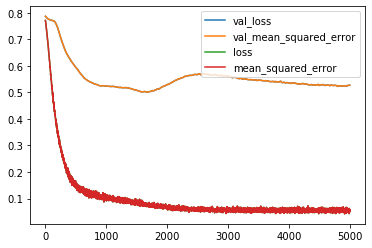

In [158]:
# to plot make data frame out of dict history.history and use .plot() method
pd.DataFrame(history.history).plot()
#pyplot.show()


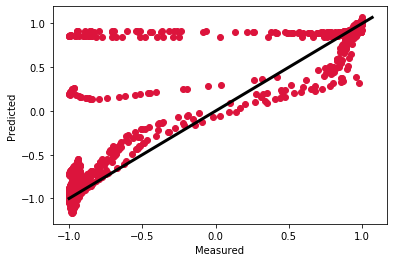

In [135]:
yhat=model.predict(X_test.reshape(X_test.shape[0], k, n_features))
#plt.gca().spines['top'].set_visible(False)

fig, ax = plt.subplots()
#plt.gca().spines['right'].set_visible(False)
ax.scatter(y_test, yhat,  c='crimson')
ax.plot([y_test.min(), yhat.max()], [y_test.min(),  yhat.max()], 'k', lw=3)
#plt.plot(y_test, yhat, zorder=1)  
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


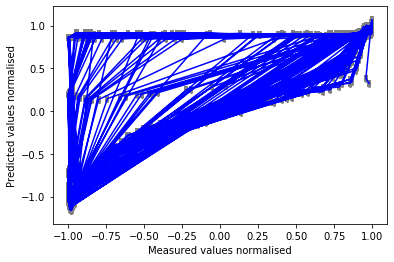

In [136]:
##### plt.scatter(y_test_unscaled , y_pred_unscaled,  color='#0000CC')
fig, ax = plt.subplots()
dy = 0.04
plt.errorbar(y_test, yhat, yerr=dy, fmt='b', color='r',
             ecolor='gray', elinewidth=4, capsize=1);

ax.set_xlabel('Measured values normalised')
ax.set_ylabel('Predicted values normalised')
fig.savefig(fileNameForDLFigures(midfix = 'PredAgainstTested_Charging'))

In [123]:
def unscale(y_values, scaler):
    return scaler.inverse_transform(y_values)

y_pred_unscaled, y_test_unscaled = unscale(yhat_copy_df, scaler), unscale(y_test_copy_df, scaler)



NameError: name 'yhat_copy_df' is not defined